In [1]:
# import os, json
# import pandas as pd

# def extract_csv_files(folder_path):
#     csv_files = []
#     for file in os.listdir(folder_path):
#         if file.endswith('.json'):
#             csv_files.append(os.path.join(folder_path, file))
#     return csv_files

# # Specify the folder path
# folder_path = './data/json'

# # Extract CSV files from the folder
# csv_files = extract_csv_files(folder_path)

# merged_list = []

# for i in csv_files:
#     with open(i, "r") as json_file:
#         data_as_list = json.load(json_file)
#     merged_list.extend(data_as_list)
    
# df = pd.DataFrame(merged_list)
# df.to_csv("./data/csv/merged_laptops.csv", index=False)
# print(len(df))

In [2]:
import os, json
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

df_original = pd.read_csv("./data/csv/merged_laptops.csv")

df = df_original.copy()
len(df)

/tmp/ipykernel_9232/3889931821.py:5: DtypeWarning: Columns (4,5,7,9,10,18,19,26,30,35,37,41,43,83,96,104,106,107,108,109,111,112,115,116,117,120,121,123,125,129,130,131,132,133,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,156,157,158,159,161,162,163,164,165,166,167,168,169,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,187,188,189,190,191,192,193,194,195,196,197,198,200,201,202,203,204,205,206,207,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,245,246,247,249,250,251,252,253,254,255,256,257,259,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("./data/csv/merged_laptops.csv")


8049

In [3]:
df.sample(5)

,Price,Title,Standing screen display size,Screen Resolution,Max Screen Resolution,Processor,RAM,Hard Drive,Graphics Coprocessor,Chipset Brand,...,Output Wattage,Power source type,Mounting type,Place of Business,Is discontinued by manufacturer,Item Package Quantity,Batteries Included?,Batteries Required?,Battery Cell Type,Average Battery Life
7663,1983.1500,ASUS TUF Dash F15 Gaming Laptop 2023 | 15.6” 1...,15.6 Inches,NaN,NaN,2.9 GHz core_i7_family,32 GB DDR5,1 TB SSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,768.3864,"Apple 15.4in MacBook Pro Laptop (Retina, Touch...",15 Inches,2560 x 1600 pixels,1920x1080,2.6 GHz core_i7,16 GB DDR4,512 GB SSD,Radeon Pro 560X with 4GB of GDDR5 memory,AMD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1546,1767.9864,"16 inch Laptop, 16GB DDR4 512GB SSD, Intel Qua...",16 Inches,1920 x 1200 pixels,1920x1200 Pixels,3.4 GHz celeron,LPDDR4,512 GB SSD,Intel HD Graphics 520,Intel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,494.2400,(Refurbished) Dell Inspiron Grey Curved Beauty...,15.6 Inches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6501,149.9900,Acer Chromebook 511 C741L Chromebook - LTE - H...,11.6 Inches,NaN,NaN,2.4 GHz Snapdragon_MSM8260A,4 LPDDR4X,32 GB Emmc,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8049, 263)

We can see that there are more than 250 features in our dataset, let's explore the null values in them.

In [5]:
print("Total NaN values:", df.isna().sum().sum())

df.isna().sum()

Total NaN values: 1852853


Price                             57
Title                              0
Standing screen display size     299
Screen Resolution               2645
Max Screen Resolution           6269
                                ... 
Item Package Quantity           8048
Batteries Included?             8048
Batteries Required?             8048
Battery Cell Type               8048
Average Battery Life            8048
Length: 263, dtype: int64

- We can notice that there are significantly many features that have more than 50% of the null values.
- But among those there are a few features which we will be needing.
- So after excluding them, we can drop the features.

In [6]:
# 50 % for our dataset
num_rows = len(df)
df_50_value = ( 50 / 100 ) * num_rows

feature_importance = {}

imp_cols = ["Graphics Card Ram Size", "Form Factor", "Processor Speed", "Memory Technology",
            
            "Graphics Chipset Brand", "Graphics Card Description", "Graphics RAM Type",
            "Hard Drive", "Hard Drive Size", "RAM", "RAM Size", "Processor", "Country of Origin"
            ]

for i in df.columns:
    if df[i].isna().sum() >= df_50_value:
        if i not in imp_cols:
            df.drop(columns=[i], inplace=True)

df.shape

(8049, 31)

In [7]:
counter = 0
for i in imp_cols:
    particular_nan = df[i].isna().sum()
    print(i,"NaN:", particular_nan)
    print()
    counter += particular_nan

print("Total Nan:", counter)

Graphics Card Ram Size NaN: 5505

Form Factor NaN: 4595

Processor Speed NaN: 4138

Memory Technology NaN: 4260

Graphics Chipset Brand NaN: 4166

Graphics Card Description NaN: 4057

Graphics RAM Type NaN: 4359

Hard Drive NaN: 4405

Hard Drive Size NaN: 5371

RAM NaN: 4474

RAM Size NaN: 4524

Processor NaN: 4432

Country of Origin NaN: 4287

Total Nan: 58573


**Observations:**

- We can see that our base dataset has 8049 rows and 27 features.
- We will be ready with the final dataset will be after:

    - Cleaning
    - Pre-processing
    - Feature engineering

In [8]:
# # 50 % for our dataset
# num_rows = len(df)
# df_75_value = ( 75 / 100 ) * num_rows

# feature_importance = {}

# for i in df.columns:
#     if df[i].isna().sum() >= df_75_value:
#         df.drop(columns=[i], inplace=True)
#     else:
#         user_input = int(input(f"Importance of {i}; 0-NO, 1-YES: "))
#         feature_importance[i] = (user_input)

# print(feature_importance)

In [9]:
# # 200 % for our dataset
# num_rows = len(df)
# df_20_value = ( 20 / 100 ) * num_rows
# df_20_value

# feature_importance = {}

# for i in df.columns:
#     if (df[i].isna().sum()) > df_20_value:
#         user_input = int(input(f"Importance of {i}; 0-NO, 1-YES: "))
#         feature_importance[i] = (user_input)
        
# for key, value in feature_importance.items():
#     if value == 0:
#         df.drop(columns=[key], inplace=True)

# df.shape

**Outcome:**

- We are just left with 18 features in the dataset, earlier it was 263.

- That is just 6.84% of the features.

- This is not ideal but the features didn't really provide any valuable insights.

### Exploring the remaining null values.

In [10]:
print("Total NaN values:", df.isna().sum().sum())

df.isna().sum()

Total NaN values: 95977


Price                             57
Title                              0
Standing screen display size     299
Screen Resolution               2645
Processor                       4432
RAM                             4474
Hard Drive                      4405
Graphics Coprocessor            4022
Number of USB 3.0 Ports         3339
Brand                             90
Series                           830
Operating System                 318
Item Weight                     1956
Product Dimensions              2472
Processor Brand                  272
Batteries                       3682
Item model number               2138
Graphics Card Ram Size          5505
Manufacturer                    3765
Colour                          3529
Form Factor                     4595
Processor Type                  3994
Processor Speed                 4138
RAM Size                        4524
Memory Technology               4260
Hard Drive Size                 5371
Hard Disk Description           3996
G

- We are dealing 79,696 instances of null values in our dataset.
- Our aim is to reduce this closer to 0.

Missed Features from the Dataset.

Graphics Card Ram Size
Form Factor
Processor Speed
Memory Technology
Hard Drive Size
Graphics Chipset Brand
Graphics Card Description
Graphics RAM Type
Lithium Battery Energy Content

- Let's filter out those features by analysing manually which features do not contribute in determining the price of the laptop.

- This is a crucial situation where having domain expertise is super beneficial.

- Removing relevant features that impact the price of the laptop will lead to a bad model.

- To start we can analyze the features using a correlation heatmap, which works only on the numerical data.

In [11]:
pd.set_option("display.max_columns", None)

In [12]:
df.sample(5)

,Price,Title,Standing screen display size,Screen Resolution,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Item Weight,Product Dimensions,Processor Brand,Batteries,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin
6806,449.99,"HP Laptop 14, Intel Pentium Silver N6000, Inte...",14 Inches,NaN,3.3 GHz pentium,4 GB DDR4,SSD,NaN,1.0,HP,HP Laptop 14,Windows 11 Home,NaN,NaN,Intel,1 Lithium Ion batteries required. (included),6P018UA#ABL,NaN,NaN,Natural Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805,977.84,"ASUS Vivobook 15 15.6"" FHD Touchscreen Busines...",15.6 Inches,1920 x 1080 pixels,4.7 GHz apple_ci7,16 DDR4,512 GB SSD,Intel Iris Xe Graphics,NaN,ASUS,ASUS Laptop,Windows 11 Pro,3.74 pounds,14.16 x 9.48 x 0.78 inches,Intel,1 Lithium Ion batteries required. (included),ASUS Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7097,759.99,"Panasonic Toughbook CF-54, Intel Core i5-5300U...",14 Inches,NaN,2.3 GHz core_i5,16 GB DDR4,1 TB SSD,NaN,NaN,Panasonic,CF-54,Windows 10,NaN,NaN,Intel,1 Lithium Ion batteries required.,CF-54 MK1,NaN,NaN,Silver/Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,1123.04,"Lenovo IdeaPad Slim 5 Intel Core i5 13500H 16""...",16 Inches,1920 x 1080 pixels,NaN,NaN,NaN,Intel Iris Xe Graphics,4.0,Lenovo,IdeaPad Slim 5 16IRL8,Windows 11 Home,1 kg 890 g,50.7 x 9.3 x 50.7 cm; 1.89 kg,Intel,1 Lithium Ion batteries required. (included),82XF003GIN,NaN,Lenovo,Cloud Grey,Thin & Light,Intel Core i5,2.6 GHz,16 GB,Lpddr 5,512 GB,SSD,Intel,Integrated,Shared,China
3246,559.84,"Dell 15 (2021) Intel I5-1135G7, 8Gb, 1Tb + 256...",15.6 Inches,1920 x 1080 pixels,NaN,NaN,NaN,Intel HD Graphics 610,2.0,Dell,Inspiron 3511,Windows 10,1 kg 800 g,59.7 x 90.9 x 4.8 cm; 1.8 kg,Intel,1 Lithium Ion batteries required. (included),Inspiron 3511,NaN,Dell India Pvt Ltd,Carbon Black,Laptop,Core i5,2.4 GHz,8 GB,DDR4,1 TB,SSD,Intel,Integrated,Shared,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         7992 non-null   float64
 1   Title                         8049 non-null   object 
 2   Standing screen display size  7750 non-null   object 
 3   Screen Resolution             5404 non-null   object 
 4   Processor                     3617 non-null   object 
 5   RAM                           3575 non-null   object 
 6   Hard Drive                    3644 non-null   object 
 7   Graphics Coprocessor          4027 non-null   object 
 8   Number of USB 3.0 Ports       4710 non-null   float64
 9   Brand                         7959 non-null   object 
 10  Series                        7219 non-null   object 
 11  Operating System              7731 non-null   object 
 12  Item Weight                   6093 non-null   object 
 13  Pro

In [14]:
df["Standing screen display size"].unique()

array(['17.3 Inches', '15.6 Inches', '14 Inches', '16 Inches',
       '13.6 Inches', '14', '13.3 Inches', '13 Inches', '11.6 Inches',
       '15 Inches', '16.2 Inches', '11 Inches', '13.8 Inches', '15.6',
       '13.6', '16.1 Inches', '14.1 Inches', '15.4 Inches', '14.5 Inches',
       '13.4 Inches', '17', '12.45 Inches', '13.5 Inches', '12.2 Inches',
       '12.5 Inches', '12 Inches', '17 Inches', '14.1', '14.4 Inches',
       '8 Inches', '12.3 Inches', '16', '13.1 Inches', '12.4 Inches',
       '13', '18 Inches', nan, '10.1 Inches', '15.3', '15', '17.3', '12',
       '11.6', '12.2', '13.99 Inches', '10.5 Inches', '7 Inches',
       '13.9 Inches', '13.3', '39.6 Centimetres', '39.62 Centimetres',
       '40 Centimetres', '40', '35.6 Centimetres', '40.64 Centimetres',
       '40.9 Centimetres', '36 Centimetres', '14.01 Centimetres',
       '34.03 Centimetres', '1', '35.56 Centimetres', '33.8 Centimetres',
       '13.5', '3 Inches', '14 Centimetres', '34.3 Centimetres',
       '23.8 Inch

We should convert this into a standard size convention.

- We will proceed in converting all the values into inches, in a new column called `DisplaySizeInches`

In [15]:
import re

def convert_to_inches(measurement):
    if pd.isnull(measurement):
        return measurement
    
    # Define a regular expression pattern to match different formats
    pattern = r'(?P<value>\d+(\.\d+)?)\s*(?:Inches|Centimetres|Centimeters)?'
    
    # Match the pattern in the measurement string
    match = re.match(pattern, measurement)
    if match:
        # Extract the value and unit
        value = float(match.group('value'))
        unit = measurement[len(match.group(0)):].strip().lower()
        
        # Convert to inches if the unit is centimeters
        if unit == 'centimetres' or unit == 'centimeters':
            value *= 0.393701  # 1 centimeter = 0.393701 inches
        
        return value
    else:
        return None

# Assuming 'df' is your DataFrame and 'column_name' is the column containing measurements
df['DisplaySizeInches'] = df['Standing screen display size'].apply(convert_to_inches)


In [16]:
df['DisplaySizeInches'].unique()

array([ 17.3 ,  15.6 ,  14.  ,  16.  ,  13.6 ,  13.3 ,  13.  ,  11.6 ,
        15.  ,  16.2 ,  11.  ,  13.8 ,  16.1 ,  14.1 ,  15.4 ,  14.5 ,
        13.4 ,  17.  ,  12.45,  13.5 ,  12.2 ,  12.5 ,  12.  ,  14.4 ,
         8.  ,  12.3 ,  13.1 ,  12.4 ,  18.  ,    nan,  10.1 ,  15.3 ,
        13.99,  10.5 ,   7.  ,  13.9 ,  39.6 ,  39.62,  40.  ,  35.6 ,
        40.64,  40.9 ,  36.  ,  14.01,  34.03,   1.  ,  35.56,  33.8 ,
         3.  ,  34.3 ,  23.8 ,  43.  ,  40.6 ,  34.  ,  40.62,  43.9 ,
        29.46,  41.  ,  10.  ,  44.  ,  12.8 ,  33.78,   7.8 ,  43.94,
        20.  ,  15.67,  33.  ,  21.5 ,  17.1 , 156.  ,   7.9 ,  37.  ])

- We can now see that the values are converted into a proper structure allowing us to convert them to float values.

- Delete the previous column from which we extracted our `DisplaySizeInches`

In [17]:
df['DisplaySizeInches'] = df['DisplaySizeInches'].astype(float)

df.drop(columns=["Standing screen display size"], inplace=True)

### Next up, Screen Resolution

In [18]:
df["Screen Resolution"].unique()

array(['1600 x 900 pixels', '1920 x 1080 pixels', '1366 x 768 pixels',
       '1280x720', '1920 x 1200 pixels', '2560 x 1664 pixels',
       '2560 x 1600 pixels', '1920x1200', '3456 x 2234', nan, '1920x1080',
       '1920 x 1080', '1366 x 768', '3024 x 1964', '4096 x 2160 pixels',
       '2496 x 1664 pixels', '2880 x 1800', '3200 X 2000 pixels',
       '1366x768', '3840 x 2160 pixels', '3840 x 2400', '1536 x 1024',
       '1920 x 1200', '2256 x 1504', '2560 x 1440 pixels',
       '1440 x 900 pixels', '1600 x 600 pixels', '1280 x 720 pixels',
       '2880 x 1800 pixels', '3456 x 2234 pixels', '2496 x 1664',
       '3840 x 2400 pixels', '2400 x 1600', '2880x1920',
       '1360 x 768 pixels', '1024 x 768', '2000.0 x 4320 pixels',
       '2048x1536', '1280 x 800 pixels', '3840x2400', '1920 x 1280',
       '1920 X 1080', '1360x768', '2560 x 1440', '2.8k',
       '2256 x 1504 pixels', '1600 x 900)', '1366 x 912 pixels',
       '3000 x 2000 pixels', '2560 x 1600', '1600x900', '3840 x 2160',
 

In [19]:
import pandas as pd
import re

def extract_resolution(resolution):
    if pd.isnull(resolution):
        return None, None
    
    if "full hd" in resolution.lower():
        return 1920, 1080
    
    # Check if the resolution string mentions "HD"
    if "hd" in resolution.lower():
        return 1366, 768
    
    # Define regular expression pattern to capture resolutions
    pattern = r'(?P<horizontal>\d+)\s*[xX*]\s*(?P<vertical>\d+)\s*(?:pixels|pixel)?'
    
    
    # Match pattern in the resolution string
    match = re.match(pattern, resolution)
    if match:
        horizontal = (int(match.group('horizontal')))
        vertical = (int(match.group('vertical')))
        return int(horizontal), int(vertical)
    else:
        return None, None

# Assuming 'df' is your DataFrame and 'resolution_column' is the column containing resolutions
df['HorizontalPixels'], df['VerticalPixels'] = zip(*df['Screen Resolution'].apply(extract_resolution))

import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'HorizontalPixels' column to int only if not null
# df['HorizontalPixels'] = df['HorizontalPixels'].apply(lambda x: int(round(x)) if pd.notnull(x) else x)

# Similarly, convert 'VerticalPixels' column to int only if not null
# df['VerticalPixels'] = df['VerticalPixels'].apply(lambda x: int(round(x)) if pd.notnull(x) else x)

df['VerticalPixels'] = df['VerticalPixels'].astype(float).astype(pd.Int64Dtype(), errors='ignore')
df['HorizontalPixels'] = df['HorizontalPixels'].astype(float).astype(pd.Int64Dtype(), errors='ignore')

# Display the DataFrame with the new columns
(df.sample(5))

,Price,Title,Screen Resolution,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Item Weight,Product Dimensions,Processor Brand,Batteries,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels
436,488.2400,"Acer Aspire 1 Slim 2024 Newest Laptop, 15.6'' ...",1920 x 1080 pixels,1.1 GHz celeron_n,16 GB DDR4,512 GB SSD,Intel UHD Graphics,2.0,acer,2023 Newest Acer Aspire 1 15 Inch,Windows 11 Home,3.64 pounds,14.31 x 9.39 x 0.78 inches,Intel,1 Lithium Ion batteries required. (included),Newest Acer Aspire 1 15 Inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,1920,1080
129,503.1864,"Morostron 15.6"" Full Metal Laptop Intel Quad-C...",1920 x 1080 pixels,2900 hertz celeron,16 GB LPDDR4,256 GB SSD,Intel,NaN,Morostron,LeadBook T7 PRO,Windows 11,3.7 pounds,14.1 x 9.5 x 0.8 inches,Intel,2 Lithium Polymer batteries required. (included),LeadBook T7 PRO,16 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,1920,1080
2565,1747.0400,Lenovo IdeaPad Pro 5 Intel Core i7 13700H 16 I...,3200x1800,NaN,NaN,NaN,NVIDIA GeForce RTX 3050,NaN,Lenovo,NaN,Windows 11 Home,1 kg 950 g,51.1 x 7.4 x 51.1 cm; 1.95 kg,Intel,1 Lithium Polymer batteries required. (included),NaN,6 GB,Lenovo,NaN,Ultra-Portable,Core i7,2.4 GHz,16 GB,NaN,1 TB,SSD,NaN,Dedicated,Shared,China,16.0,3200,1800
1909,950.2400,Lenovo IdeaPad Slim 3 Intel Core i5-13420H 15....,1920 x 1080 pixel,NaN,NaN,NaN,Intel UHD Graphics,3.0,Lenovo,IdeaPad Slim 3 15IRH8,Windows 11 Home,1 kg 620 g,7.2 x 33.1 x 48.3 cm; 1.62 kg,Intel,1 Lithium Ion batteries required. (included),NaN,NaN,Lenovo,Arctic Grey,Thin & Light,Intel Core i5,2.1 GHz,16 GB,Lpddr 5,512 GB,SSD,Intel,Integrated,Shared,China,15.6,1920,1080
2841,949.1360,"Lenovo IdeaPad Flex 5 AMD Ryzen 5 5500U 14"" (3...",1927 x 1080 pixel,NaN,NaN,NaN,AMD Radeon Graphics,3.0,Lenovo,IdeaPad Flex 5 14ALC05,Windows 11 Home,1 kg 500 g,32.2 x 21.8 x 2.1 cm; 1.5 kg,AMD,1 Lithium Polymer batteries required. (included),82HU00PQIN,8 GB,Lenovo,Graphite Grey,Convertible,Ryzen 5,4 GHz,8 GB,DDR4,512 GB,SSD,AMD,Integrated,Shared,China,14.0,1927,1080


In [20]:
df["HorizontalPixels"].isna().sum()

2666

In [21]:
df["VerticalPixels"].isna().sum()

2666

In [22]:
df["HorizontalPixels"].unique()

<IntegerArray>
[1600, 1920, 1366, 1280, 2560, 3456, <NA>, 3024, 4096, 2496, 2880, 3200, 3840,
 1536, 2256, 1440, 2400, 1360, 1024, 2048, 3000, 1921, 1560, 3072, 2240, 1980,
 1927, 2160, 1925, 2296, 1926, 1929, 1932, 1924,  236, 1900, 1928, 1930, 1923,
 2736, 2800, 2561,  468, 1922, 5120, 3240, 1990]
Length: 47, dtype: Int64

In [23]:
df["VerticalPixels"].unique()

<IntegerArray>
[ 900, 1080,  768,  720, 1200, 1664, 1600, 2234, <NA>, 1964, 2160, 1800, 2000,
 2400, 1024, 1504, 1440,  600, 1920, 1536,  800, 1280,  912,  786, 1020, 1620,
 1400, 1824,  624, 2880]
Length: 30, dtype: Int64

We can now go ahead and remove the original column - `Screen Resolution`

In [24]:
df.drop(columns=["Screen Resolution"], inplace=True)

### Next, Graphics Coprocessor

In [25]:
df["Graphics Coprocessor"].unique()

array(['Intel HD Graphics 520', nan, 'Integrated', 'AMD Radeon Graphics',
       'Intel UHD Graphics', 'NVIDIA GeForce RTX 4050',
       'Intel UHD Graphics 600', 'Intel', 'Apple M2',
       'NVIDIA GeForce RTX 4070', 'NVIDIA GeForce RTX 2050',
       'Intel Iris Xe Graphics', 'Apple M2 8-core GPU',
       'Intel UHD Grsaphics', 'intel', 'Intel HD Graphics 6000',
       'NVIDIA GeForce RTX 3050 Ti',
       'Integrated ARM Mali-G52 2EE MC2 GPU', 'NVIDIA GeForce RTX 3050',
       'Intel Xe', 'M1 Pro', 'Intel UHD Graphics 617',
       'NVIDIA GeForce RTX 4060', 'Intel Iris Plus Graphics 645',
       'Intel HD Graphics 400', 'PowerVR GX6250',
       'Intel UHD Graphics 620', 'Intel UHD Graphics Up to 1.2GHz',
       'Apple M2 10-core GPU', 'Intel HD Graphics', 'Apple M1 Max',
       'AMD Radeon RX Vega 8 1.90GHz', 'i7-8650U',
       'Intel UHD Graphics 605',
       'AMD FirePro W5130M,Intel Iris Plus Graphics',
       'AMD Radeon Pro 560', 'Intel Iris Pro',
       'Radeon Pro 560X with 4GB

## Next, USB 3.0 Ports

In [26]:
df["Number of USB 3.0 Ports"].unique()

array([ 2., nan,  3.,  1.,  4.,  5.,  6., 21.])

- It would not be harm to fill the NaN values with 0 here.

- Logically if there is no 3.0 port, for marketing a device you would not put `0`.
- This would be a negative marketing of the product.

- After replace, we can convert this into type `int`

In [27]:
df["Number of USB 3.0 Ports"] = df["Number of USB 3.0 Ports"].fillna(0)
df["Number of USB 3.0 Ports"] = df["Number of USB 3.0 Ports"].astype(int)

In [28]:
df["Number of USB 3.0 Ports"].unique()

array([ 2,  0,  3,  1,  4,  5,  6, 21])

## Next, Brand

In [29]:
print(len(df["Brand"].unique()))

df["Brand"].unique()

152


array(['HP', 'UGRIHACH', 'SGIN', 'acer', 'MSI', 'hp', 'XKMURT', 'Maypug',
       'ANMESC', 'Lenovo', 'Apple', 'Dell', 'OTVOC', 'Morostron', 'TUHUI',
       'ASUS', 'LENOVO', 'ACEMAGIC', 'URAO', 'Auusda', 'SAMSUNG',
       'FUNYET', 'HP Tuners', 'Microsoft', 'lenovo', 'Oemgenuine',
       'BiTECOOL', 'ApoloMedia', 'CHUWI', 'LG', 'ZENAERO', 'Razer',
       'ECOHERO', 'OMMOTECH', 'Gateway', 'GIGABYTE', 'Asus', 'KOOFORWAY',
       'asus', 'Amazon Renewed', 'EXCaliberPC', 'Fusion5', 'THKGRCE',
       'ApoloSign', 'Panasonic', 'Samsung', 'Unknown', 'DELL',
       'Lenovo Group Limited', 'Vaio', 'Bmax', 'Exilapsire', 'Hp',
       'Rumtuk', 'AMIAMO', 'AWOW', 'Nmybwo', 'KBJPADS',
       'LENOVO (UNITED STATES)', 'Samsung Electronics', 'MECHAZER',
       'Ruchonin', 'JSHIX', 'Getac', 'Toughbook', 'Sternweh', 'jumper',
       'MTWZMM', 'Acer', 'YHBIN', 'LincPlus', 'Toshiba', 'Coolby',
       'Core Innovations', 'EVRAIN', 'Gezoon', 'ZWYING', 'thunderb',
       'LETSUNG', 'Tuofudun', 'LG Electronic

In total we have 152 unique brands in the dataset.

### Next, `Series`

In [30]:
df["Series"].unique()

array(['HP 17T', 'UG-1505', nan, ..., 'c423na', 'PH315-55',
       'Lenovo ThinkPad E16 Gen 1, AMD Ryzen 5 7530U, 16GB RAM, 2TB SSD Storage, Win11 Pro'],
      dtype=object)

This seems to be the Model of the laptop.

In [31]:
print(len(df["Operating System"].unique()))

df["Operating System"].unique()

95


array(['Windows 11 Home', '11', 'Windows 11 S', 'Windows 10',
       'Windows 11', 'Mac OS', 'Chrome OS', 'Mac OS Ventura',
       'Windows 11 Pro', 'macOS 10.12 Sierra', 'macOS 10.13 High Sierra',
       'macOS 10.15 Catalina', 'Windows 10 Pro', nan,
       'Mac OS X 10.0 Cheetah', 'macOs Ventura', 'macOS 12 Monterey',
       'macOS Catalina (version 10,15)', 'OS X 10.9 Mavericks',
       'Windows 10 Home', 'macOS 11 Big Sur', 'macOS Ventura', 'Windows',
       'OS X 10.8 Mountain Lion', 'Windows 10 Pro 64-bit',
       'macOS Big Sur', 'Mac OS X 11 Ventura', 'macOS 10.14 Mojave',
       'Windows 11 Professional', '11 Pro', 'Windows 10 S',
       'Window 10 Pro', 'Windows 11 Home AD', 'W 11',
       'Windows 7 Pro + 10 Pro', 'macOS Monterey', 'Windows 7',
       'Linux Mint', 'ChromeOS with Chrome Enterprise Upgrade', 'ANDROID',
       'ChromeOS', 'english', 'OS', '11 Home', 'Windows 11 Home S',
       'Os Catalina', 'Windows 11 Home 64, English', 'DOS', 'JioOS',
       'Windows 11 sup

### Next, `Item Weight`

In [32]:
df["Item Weight"].unique()

array(['5.25 pounds', '3.64 pounds', '4.07 pounds', '3.92 pounds',
       '3.75 pounds', '6.61 pounds', '3.24 pounds', '4.1 pounds',
       '3.74 pounds', '4.27 pounds', '3.63 pounds', '5.02 pounds',
       '3.42 pounds', '2.7 pounds', '3.35 pounds', '7.59 pounds',
       '5.1 pounds', '3.52 pounds', '3.7 pounds', '2.8 pounds',
       '5.04 pounds', '5.74 pounds', '3.94 pounds', '3 pounds',
       '5.51 pounds', '2.86 pounds', '2.65 pounds', '8.69 pounds',
       '4.6 pounds', '3.82 pounds', '1.4 pounds', '0.635 ounces',
       '7 pounds', '3.48 pounds', '4.28 pounds', '6.84 pounds',
       '10.21 pounds', '2.96 pounds', '4.13 pounds', '5.59 pounds',
       '2.64 pounds', '3.61 pounds', '4.45 pounds', '4.4 pounds',
       '4.77 pounds', '4.19 pounds', '3.46 pounds', '3.1 pounds',
       '3.81 pounds', '2.76 pounds', '6.04 pounds', '3.65 pounds',
       '3.09 pounds', '3.96 pounds', '3.95 pounds', '5.64 pounds',
       '3.25 pounds', '5.2 pounds', '2.87 pounds', '4.97 pounds',
       '5

We have the values in all kinds of forms, here are the patterns:

( `#` represents a number)

- nan
- `#` pounds
- `#` ounces (doesn't make sense)
- `#` kg `#` g
- `#` g
- `#` kg

Let's convert all the values into ` # kg`

In [33]:
import pandas as pd
import numpy as np
import re

def convert_to_kgs(weight):
    if pd.isnull(weight):
        return None
    
    # Define regular expression pattern to capture numeric values and units
    pattern = r'(\d+(\.\d+)?)\s*(pounds|ounces|kg|g)'
    
    # Match pattern in the weight string
    matches = re.findall(pattern, weight)
    
    # Initialize variable to store converted weight
    total_kgs = 0
    
    # Iterate through matches and convert to kgs
    for match in matches:
        value = float(match[0])  # Extract numeric value
        unit = match[2].lower()  # Extract unit
        
        # Convert to kgs
        if unit == 'pounds':
            total_kgs += value * 0.453592  # 1 pound = 0.453592 kilograms
        elif unit == 'ounces':
            total_kgs += value * 0.0283495  # 1 ounce = 0.0283495 kilograms
        elif unit == 'kg':
            total_kgs += value
        elif unit == 'g':
            total_kgs += value / 1000  # 1 gram = 0.001 kilograms
    
    return total_kgs

# Assuming 'df' is your DataFrame and 'weight_column' is the name of the column containing weights
df['WeightKg'] = df['Item Weight'].apply(convert_to_kgs)


In [34]:
df["WeightKg"].unique()

array([2.38135800e+00, 1.65107488e+00, 1.84611944e+00, 1.77808064e+00,
       1.70097000e+00, 2.99824312e+00, 1.46963808e+00, 1.85972720e+00,
       1.69643408e+00, 1.93683784e+00, 1.64653896e+00, 2.27703184e+00,
       1.55128464e+00, 1.22469840e+00, 1.51953320e+00, 3.44276328e+00,
       2.31331920e+00, 1.59664384e+00, 1.67829040e+00, 1.27005760e+00,
       2.28610368e+00, 2.60361808e+00, 1.78715248e+00, 1.36077600e+00,
       2.49929192e+00, 1.29727312e+00, 1.20201880e+00, 3.94171448e+00,
       2.08652320e+00, 1.73272144e+00, 6.35028800e-01, 1.80019325e-02,
       3.17514400e+00, 1.57850016e+00, 1.94137376e+00, 3.10256928e+00,
       4.63117432e+00, 1.34263232e+00, 1.87333496e+00, 2.53557928e+00,
       1.19748288e+00, 1.63746712e+00, 2.01848440e+00, 1.99580480e+00,
       2.16363384e+00, 1.90055048e+00, 1.56942832e+00, 1.40613520e+00,
       1.72818552e+00, 1.25191392e+00, 2.73969568e+00, 1.65561080e+00,
       1.40159928e+00, 1.79622432e+00, 1.79168840e+00, 2.55825888e+00,
      

We have successfully converted all the values into float and nan values are left.

In [35]:
for i in df["WeightKg"].unique():
    print(i)

2.381358
1.6510748800000001
1.84611944
1.77808064
1.7009699999999999
2.99824312
1.4696380800000002
1.8597271999999998
1.6964340800000002
1.9368378399999997
1.64653896
2.27703184
1.55128464
1.2246984
1.5195332
3.44276328
2.3133192
1.59664384
1.6782904
1.2700576
2.28610368
2.60361808
1.78715248
1.360776
2.4992919199999997
1.2972731199999998
1.2020188
3.94171448
2.0865232
1.73272144
0.6350288
0.0180019325
3.175144
1.57850016
1.94137376
3.10256928
4.63117432
1.3426323199999999
1.87333496
2.53557928
1.1974828800000001
1.63746712
2.0184844
1.9958048000000002
2.1636338399999997
1.9005504800000002
1.5694283199999999
1.4061352
1.72818552
1.2519139199999998
2.73969568
1.6556108
1.40159928
1.7962243199999999
1.7916884
2.55825888
1.474174
2.3586784
1.30180904
2.25435224
2.39950168
4.6039588
2.19538528
1.4514944
1.80983208
2.4902200800000003
1.3154168
1.7236496
0.059817445
1.587572
1.35624008
2.041164
1.814368
0.907184
1.50138952
3.01185088
1.1793392
0.5987414400000001
1.07954896
1.4968536
1.750865

In [36]:
# Removing the original column
df.drop(columns=["Item Weight"], inplace=True)

### Next, `ProductDimensions`

In [37]:
for i in df["Product Dimensions"].unique():
    print(i)

15.78 x 0.78 x 10.15 inches
13.98 x 0.79 x 8.98 inches
17.3 x 10 x 0.6 inches
14.29 x 0.74 x 9.35 inches
14.1 x 9.53 x 0.71 inches
15.76 x 1.1 x 11.55 inches
8.86 x 12.76 x 0.71 inches
14.13 x 9.99 x 0.85 inches
14.11 x 9.52 x 0.78 inches
14.2 x 9.59 x 0.71 inches
13.97 x 0.78 x 8.97 inches
14.18 x 9.29 x 0.7 inches
11.97 x 8.46 x 0.44 inches
14.31 x 0.78 x 9.39 inches
12.85 x 0.72 x 8.94 inches
12.76 x 8.86 x 0.71 inches
14.13 x 10.2 x 0.98 inches
14.09 x 10.04 x 0.93 inches
14.17 x 9.29 x 0.73 inches
14.11 x 9.27 x 0.74 inches
12 x 10 x 10 inches
11.97 x 8.46 x 0.04 inches
14.07 x 9.65 x 0.72 inches
14.1 x 9.5 x 0.8 inches
14 x 8.8 x 0.7 inches
12.34 x 0.78 x 8.94 inches
16 x 12 x 10 inches
14.19 x 1.06 x 10.67 inches
12.83 x 8.73 x 0.73 inches
11.65 x 8.11 x 0.79 inches
13.94 x 0.81 x 10.2 inches
15.78 x 10.15 x 0.78 inches
14.11 x 9.27 x 0.83 inches
12 x 1 x 7 inches
14.1 x 9.3 x 0.78 inches
14.11 x 9.53 x 0.71 inches
13.94 x 0.89 x 10.39 inches
14.03 x 9.6 x 0.75 inches
25.17 x 35

We can see that these probably include `length x width x height` as the standard notation.

- The dataset has `inches` as well as `cm` as the Unit Measure.

- There is weight included too so it can be helpful, if we check that for the corresponding row, if the `WeightKg` is NaN we can use the weight mentioned in `Product Dimensions` and fill `WeightKg` 

**Procedure:**
- Let's proceed by making a three new columns which will have `inches` as the unit.
    - `LengthInches`
    - `WidthInches`
    - `HeightInches`

- Another column `DimensionsKg` and later we will cross-verify with `WeightKg`

In [38]:
def extract_dimensions_and_weight(dimensions_str):
    if pd.isnull(dimensions_str):
        return None, None, None, None
    
    # Define regular expression pattern to capture dimensions and weight
    pattern_dimensions = r'(?P<length>[\d.]+)\s*x\s*(?P<width>[\d.]+)\s*x\s*(?P<height>[\d.]+)\s*inches'
    pattern_weight = r'(?P<weight>[\d.]+)\s*(?:kg|g)'
    
    # Match pattern in the dimensions string
    match_dimensions = re.match(pattern_dimensions, dimensions_str)
    match_weight = re.search(pattern_weight, dimensions_str)
    
    if match_dimensions:
        length_inches = float(match_dimensions.group('length'))
        width_inches = float(match_dimensions.group('width'))
        height_inches = float(match_dimensions.group('height'))
    else:
        # If dimensions are not specified in inches, try to convert to inches
        pattern_cm = r'(?P<length>[\d.]+)\s*x\s*(?P<width>[\d.]+)\s*x\s*(?P<height>[\d.]+)\s*cm'
        match_cm = re.match(pattern_cm, dimensions_str)
        if match_cm:
            length_cm = float(match_cm.group('length'))
            width_cm = float(match_cm.group('width'))
            height_cm = float(match_cm.group('height'))
            
            # Convert dimensions from cm to inches
            length_inches = length_cm * 0.393701  # 1 cm = 0.393701 inches
            width_inches = width_cm * 0.393701
            height_inches = height_cm * 0.393701
        else:
            return None, None, None, None
    
    # Extract weight if present
    if match_weight:
        weight = float(match_weight.group('weight'))
        
        # Convert weight to kilograms if it's specified in grams
        if 'kg' in dimensions_str:
            weight_kgs = weight
        else:
            weight_kgs = weight / 1000  # 1 gram = 0.001 kilograms
    else:
        weight_kgs = None
        
    return length_inches, width_inches, height_inches, weight_kgs


### Applying this on a Sample Data

In [39]:
# Sample data
data = ['8.86 x 12.76 x 0.71 inches',
        '14.13 x 9.99 x 0.85 inches',
        np.nan,
        '22 x 32.3 x 1.9 cm; 1.48 kg',
        '8 x 26.5 x 38.1 cm; 1.8 kg',
        '7.2 x 33.1 x 48.3 cm; 1.62 kg',
        '35.9 x 24.2 x 1.8 cm; 1.69 kg',
        '30.7 x 20.7 x 1.6 cm; 998 g',
        '36.5 x 24 x 1.88 cm']

# Create DataFrame
df_try = pd.DataFrame(data, columns=['dimensions_str'])

df_try[['length_inches', 'width_inches', 'height_inches', 'weight_kgs']] = df_try['dimensions_str'].apply(extract_dimensions_and_weight).apply(pd.Series)

(df_try)

,dimensions_str,length_inches,width_inches,height_inches,weight_kgs
0,8.86 x 12.76 x 0.71 inches,8.860000,12.760000,0.710000,NaN
1,14.13 x 9.99 x 0.85 inches,14.130000,9.990000,0.850000,NaN
2,NaN,NaN,NaN,NaN,NaN
3,22 x 32.3 x 1.9 cm; 1.48 kg,8.661422,12.716542,0.748032,1.480
4,8 x 26.5 x 38.1 cm; 1.8 kg,3.149608,10.433077,15.000008,1.800
5,7.2 x 33.1 x 48.3 cm; 1.62 kg,2.834647,13.031503,19.015758,1.620
6,35.9 x 24.2 x 1.8 cm; 1.69 kg,14.133866,9.527564,0.708662,1.690
7,30.7 x 20.7 x 1.6 cm; 998 g,12.086621,8.149611,0.629922,0.998
8,36.5 x 24 x 1.88 cm,14.370087,9.448824,0.740158,NaN


### Applying this on our Dataset

In [40]:
df[['LengthInches', 'WidthInches', 'HeightInches', 'DimensionsKg']] = df['Product Dimensions'].apply(extract_dimensions_and_weight).apply(pd.Series)

# Display the DataFrame
(df.sample(5))

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Product Dimensions,Processor Brand,Batteries,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,DimensionsKg
6557,1679.0000,"ASUS ROG Strix G15 (2022) Gaming Laptop, 15.6”...",3.2 GHz none,16 GB DDR5,1 TB SSD,NaN,4,ASUS COMPUTER INTL,ASUS ROG Strix G15 (2022) Gaming Laptop,Windows 11 Home,25.91 x 35.31 x 2.79 cm; 2.5 g,AMD,1 Lithium Ion batteries required. (included),G513RM-AS71-CA,NaN,NaN,Eclipse Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,<NA>,<NA>,NaN,10.200793,13.901582,1.098426,0.0025
6990,1299.0000,"Lenovo Yoga 7i 2-in-1 14"" 2.2K Touchscreen Lap...",1.3 GHz core_i5,16 GB DDR5,2 TB SSD,NaN,0,Lenovo,Lenovo Yoga,Windows 11 Home,NaN,Intel,NaN,Lenovo Yoga 7i,NaN,NaN,Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
933,322.3200,Dell Latitude 5400 Business Laptop with Backli...,1.6 GHz apple_ci5,DDR4,512 GB SSD,NaN,4,Dell,Dell Latitude 5400,Windows 10 Pro,12.72 x 8.5 x 0.75 inches,Intel,NaN,Dell Latitude 5400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1920,1080,2.535579,12.720000,8.500000,0.750000,NaN
4492,575.9840,(Refurbished) HP 15s-11th Gen Intel Core i3- 8...,NaN,NaN,NaN,NaN,0,HP,15s- fq2629TU,Windows 11 Home,35.9 x 24.2 x 1.8 cm; 1.69 kg,Intel,NaN,NaN,NaN,intel,Natural Silver,Laptop,Core i3,3.7 GHz,8 GB,DDR4,NaN,SSD,Intel,Integrated,VRAM,India,15.6,1920,1080,1.690000,14.133866,9.527564,0.708662,1.6900
275,651.4264,"Acer Aspire 5 A515-57-53T2 Slim Laptop | 15.6""...",4.4 GHz core_i5,8 GB DDR4,512 GB SSD,Intel Iris Xe Graphics,4,acer,A515-57-53T2,Windows 11 Home,9.36 x 14.29 x 0.7 inches,Intel,1 Lithium Ion batteries required. (included),NX.K3KAA.001,8 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,1920,1080,1.759937,9.360000,14.290000,0.700000,NaN


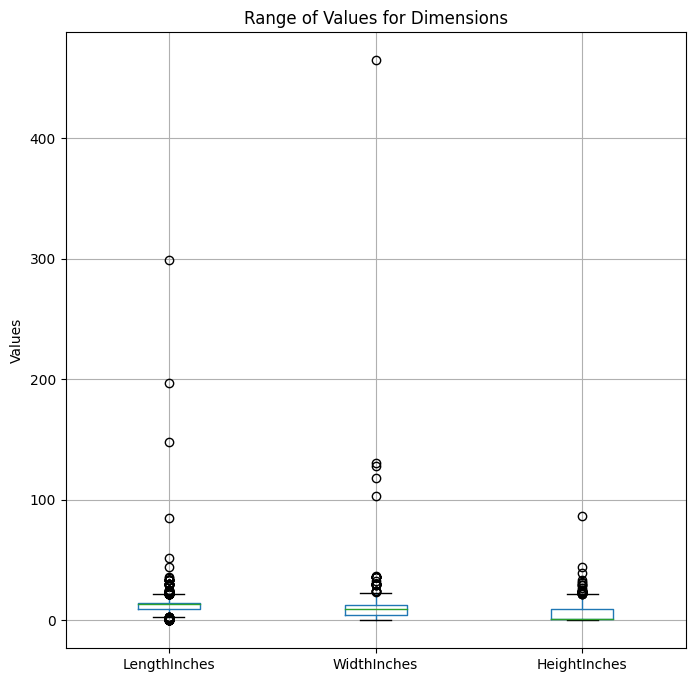

In [41]:
import matplotlib.pyplot as plt

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the width and height as needed

# Create boxplots for the subset of columns
df[['LengthInches', 'WidthInches', 'HeightInches']].boxplot(ax=ax)

# Set plot labels and title
ax.set_ylabel('Values')
ax.set_title('Range of Values for Dimensions')

# Show plot
plt.show()


### Narrowing the Y-Axis to focus on Main Group

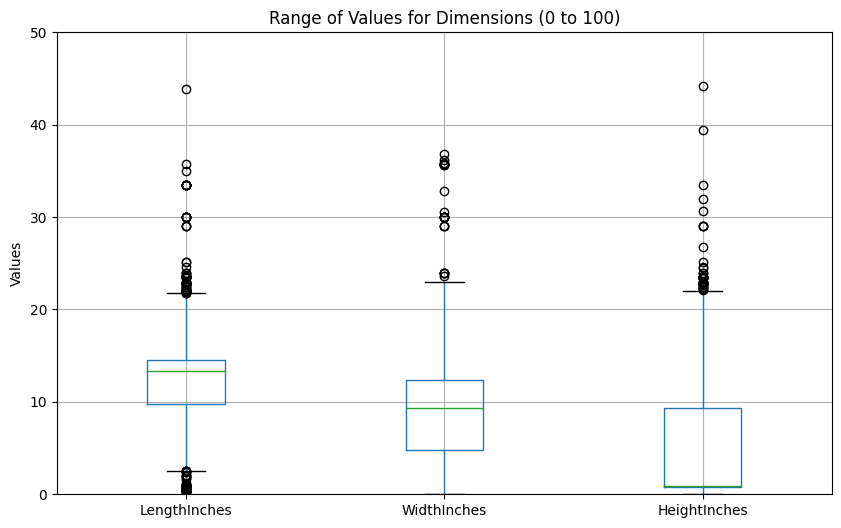

In [42]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Create boxplots for the subset of columns
boxplot = df[['LengthInches', 'WidthInches', 'HeightInches']].boxplot(ax=ax)  # Exclude outliers

# Set y-axis limit to focus on the range of interest
ax.set_ylim(0, 50)

# Set plot labels and title
ax.set_ylabel('Values')
ax.set_title('Range of Values for Dimensions (0 to 100)')

# Show plot
plt.show()


As we did not know if the Dimensions followed the standard convention: `length x width x height`.

- By visualising the BoxPlots we can confirm that in majority of the cases, yes the standard convention holds true.

- When we talk about laptop dimensions:
    - Length has the highest value.
    - Followed by Width.
    - Height / Thickness is the least.

In [43]:
# Dropping the Dimensions Column in the dataset

df.drop(columns=["Product Dimensions"], inplace=True)

### Comparing WeightsKg and DimensionKg

Let's check the number of NaN values in `WeightKg` without any processing.

In [44]:
df["WeightKg"].isna().sum()

1956

In [45]:
df['WeightKg'] = df.apply(lambda row: row['DimensionsKg'] if (pd.isnull(row['WeightKg']) or row['WeightKg'] == 0) and (pd.notnull(row['DimensionsKg']) and row['DimensionsKg'] != 0) else row['WeightKg'], axis=1)

In [46]:
df["WeightKg"].isna().sum()

901

Let's drop the column - `DimensionsKg`

In [47]:
df.drop(columns=["DimensionsKg"], inplace=True)

**Observations:**
- We can see that we reduced the NaN values under `WeightKg` by 53%
- This was possible due to exploring the features in the dataset.

### Processor Brand

In [48]:
df["Processor Brand"].unique()

array(['Intel', 'AMD', 'Apple', 'MediaTek', 'core_i5', nan, 'Qualcomm',
       'ARM', 'Dell', 'IBM', 'NVIDIA', 'Samsung', 'Allwinner', 'core_i7',
       'Intel, AMD, IBM', 'Ryzen', 'Intel Iris Xe Graphics', 'VIA',
       'AMD Ryzen 9 6900HX', 'Allwiner', 'Cerelon', 'Qualcomm Kryo 468'],
      dtype=object)

- We can implement One-Hot encoding for this and convert the textual data into numerical features.

- Researching about each Process Brand being valid or not, can give more insights on this feature.

### Next, Batteries

Let's explore the values for each type of battery

In [49]:
battery_counts = df["Batteries"].value_counts()
battery_percentages = (battery_counts / len(df)) * 100

print(len(df["Batteries"].unique()))
print(round(battery_percentages, 2))

34
Batteries
1 Lithium Ion batteries required. (included)         36.44
1 Lithium Polymer batteries required. (included)     10.90
1 Lithium Ion batteries required.                     3.42
1 Lithium Metal batteries required. (included)        1.09
2 Lithium Polymer batteries required. (included)      0.47
1 Lithium Polymer batteries required.                 0.47
2 Lithium Ion batteries required. (included)          0.35
3 Lithium Ion batteries required. (included)          0.22
1 Product Specific batteries required. (included)     0.10
1 A batteries required. (included)                    0.10
1 AAA batteries required. (included)                  0.09
1 Lithium Metal batteries required.                   0.09
1 Unknown batteries required. (included)              0.07
1 9V batteries required. (included)                   0.05
3 Lithium Polymer batteries required. (included)      0.05
Lithium Ion batteries required. (included)            0.04
2 Lithium Ion batteries required.          

**Observations:**

- 1 Lithium Ion batteries required. (included)         36.44
- 1 Lithium Polymer batteries required. (included)     10.90
- 1 Lithium Ion batteries required.                     3.42
- 1 Lithium Metal batteries required. (included)        1.09

- The above four, take most of the instances in the Battery column, and rest are not repeated.
- This column does not even impact the price of a laptop significantly.
- Hence dropping this would be a good approach.

In [50]:
df.drop(columns=["Batteries"], inplace=True)

### Inspecting Model Numbers

In [51]:
print(len(df["Item model number"].unique()))

df["Item model number"].unique()

3371


array([nan, 'LT1505', 'M17S', ..., 'c423na-cr', 'PH315-55',
       'B1500CEAE-Q53P-CB'], dtype=object)

- In total we have 5911 Non-Null values and out of those, 3371 are unique.
- i.e 57% values are unique, 43% models are repeated. 

- This prompts as the dataset has been collected from amazon of different countries, it's possible that we extracted the same model number.

- To check this we can drop the price and compare the remaining specifications of the laptop.

- We drop price because the market value of the same product varies in different countries.

In [52]:
X_temp = df.drop(columns=["Price"])
y_temp = df["Price"]

### Checking for duplicates in the dataset

In [53]:
len(X_temp[X_temp.duplicated()])

2424

- We have 2428 rows in our dataset which have repeated more than once.

- This is concerning as we have total 8049 rows.

- The duplicated data is 30%

### Exploring the duplicates

Initial assumption was that only the Graphic Coprocessor and the Brand would allow us to find out all the duplicates. 

In [54]:
filtered_df = X_temp[(X_temp["Graphics Coprocessor"] == "Intel HD Graphics 520") & (X_temp["Brand"] == "HP")]

print("Assumed duplicates:",len(filtered_df))

Assumed duplicates: 82


In [55]:
# Check if all columns have the same values
all_same = (filtered_df == filtered_df.iloc[0]).all()

# Print the result
print("Are all columns the same in the filtered DataFrame:\n", all_same)


Are all columns the same in the filtered DataFrame:
 Title                        False
Processor                    False
RAM                          False
Hard Drive                   False
Graphics Coprocessor          True
Number of USB 3.0 Ports      False
Brand                         True
Series                       False
Operating System             False
Processor Brand               True
Item model number            False
Graphics Card Ram Size       False
Manufacturer                 False
Colour                       False
Form Factor                  False
Processor Type               False
Processor Speed              False
RAM Size                     False
Memory Technology            False
Hard Drive Size              False
Hard Disk Description        False
Graphics Chipset Brand       False
Graphics Card Description    False
Graphics RAM Type            False
Country of Origin            False
DisplaySizeInches            False
HorizontalPixels             False
Ve

In [56]:
# Check for duplicates in the filtered DataFrame
duplicates = filtered_df[filtered_df.duplicated()]

print("Total duplicates:",len(duplicates))

duplicates.sample(3)

Total duplicates: 68


,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches
902,"HP 17 Laptop i5-1235U, 512 GB SSD, 16GB RAM, 1...",3.3 GHz core_i5,16 DDR4,512 GB SSD,Intel HD Graphics 520,2,HP,HP 17T,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,1600,900,2.381358,15.78,0.78,10.15
127,"HP 17 Laptop i5-1235U, 512 GB SSD, 16GB RAM, 1...",3.3 GHz core_i5,16 DDR4,512 GB SSD,Intel HD Graphics 520,2,HP,HP 17T,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,1600,900,2.381358,15.78,0.78,10.15
1454,"HP 17 Laptop i5-1235U, 512 GB SSD, 16GB RAM, 1...",3.3 GHz core_i5,16 DDR4,512 GB SSD,Intel HD Graphics 520,2,HP,HP 17T,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,1600,900,2.381358,15.78,0.78,10.15


In this particular instance, where `Brand` - HP, and `Graphics Coprocessor` - Intel HD Graphics 520

**Observations:**
There are 68 such instances where we have a laptop with different other features.

But when we check the exact duplicates there are only 5.

- Hence a conclusion is that Model Number being duplicated just indicates that there are more options in the same model number.

### Moving to Manufacturer

In [57]:
len(df["Manufacturer"].unique())

151

We have total 151 Unique Manufacturers in our dataset.

### Working with Colours

In [58]:
len(df["Colour"].unique())

281

We have 281 unique colours in our dataset.

We observed that there are values in the column which are actually not a colour, but another specification.

### Exploring Processor Types

In [59]:
print(len(df["Processor Type"].unique()))

df["Processor Type"].unique()

146


array([nan, 'Core i3 Family', 'Intel Core i5', 'Core i3', 'Intel Core i3',
       'Celeron', 'Ryzen 3', 'AMD Ryzen 5 5500U', 'Celeron N4020',
       'Core i7', 'Pentium', 'Core i5', 'Ryzen 5', 'Core i5-12450H',
       'Athlon X2 Dual Core 7750', 'Ryzen 7', 'Intel Core i7',
       'Ryzen 3 3250U', 'Celeron N', 'Core i5 Family', 'Core i5 6200U',
       'Core M Family', 'AMD Ryzen 7', 'Core i7-1255U', 'Others',
       'Core i3-1215U', 'Core i5-1235U', 'Ryzen 5 5600H',
       'Core I3 1115G4', 'Athlon', 'Ryzen 9', 'Core i5 8250U',
       'AMD Ryzen 7 5700U', 'MediaTek Kompanio 520', 'Ryzen 5 5500U',
       'Core i5-2300', 'Core i9', 'Core i5-11320H', 'Core i7-12650H',
       'Celeron N2930', 'Core i5-1035G1', 'Ryzen 7 2700U',
       'Ryzen 3 5300U', 'Core i5 4300U', 'Core i5 5675C', 'Core i5-6260U',
       'A Series', 'Core i7 Family', 'Core i3-350M', 'Core i5 7200U',
       'Core i5-6440HQ', 'Unknown', 'AMD A8', 'MediaTek MT8125',
       'Core i5 3317U', 'Core i7 4800MQ', 'Intel Core i5-1

- We have 146 unique processors.

- Along with the model number of the processor, we can engineer a new feature.

- We can classify them based on Intel / AMD / Other in a new column

### Exploring Hard Disk

In [60]:
print(len(df["Hard Disk Description"].unique()))

df["Hard Disk Description"].unique()

26


array([nan, 'SSD', 'SSHD', 'Emmc', 'HDD', 'Solid State Hard Drive',
       'Hybrid Drive', 'Hybrid', 'SATA', 'NVMe PCIe SSD',
       'HDD, Solid State Hard Drive', 'Embedded MultiMediaCard',
       'HDD, Hybrid Drive, Solid State Hard Drive',
       'Solid State Drive, SSD', 'Solid State Drive', 'SSD & HDD',
       '500 GB', '256', 'Hybrid Drive, Solid State Hard Drive',
       'eMMC 5.1', 'Nvme/SATA', 'Serial ATA', 'Mechanical Hard Drive',
       '512GB SSD + 1TB HDD 5400 RPM',
       'Embedded MultiMediaCard, Solid State Hard Drive',
       '512GB SSD M.2 2280 PCIe'], dtype=object)

We have 26 unique values under hard disk description.

- We can go feature engineer and classify them.

- Some values are the abbreviations.

- We can reduce the unique values further.

In [61]:
df.sample(10)

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches
4642,463.3600,(Renewed) Dell Latitude 7490 Intel Core i7-865...,NaN,NaN,NaN,NaN,0,Dell,Dell Latitude,Windows 10,Intel,Dell Latitude,16 GB,intel,black,Laptop,Core i7,1.9 GHz,16 GB,DDR4,256 GB,SSD,Intel,Integrated,NaN,India,14.0,1366,768,2.630000,NaN,NaN,NaN
818,679.9864,"HP 2023 Upgraded Touchscreen Laptop, 14"" HD Co...",3.8 GHz ryzen_3,16 DDR4,1024 GB SSD,AMD,0,HP,HP,Windows 11,AMD,14-fq1003cl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1366,768,1.469638,12.760000,8.860000,0.710000
5469,863.8400,(Refurbished) HP Pavilion 15 12Th Gen Intel Co...,NaN,NaN,NaN,Intel Iris Xe Graphics,0,HP,NaN,Windows 10,Intel,NaN,3 GB,HP,Natural Silver,Laptop,Core i7,4.7 GHz,16 GB,Sdram,16 GB,SSD,Intel,NaN,NaN,India,15.6,1920,1080,2.690000,NaN,NaN,NaN
6587,609.9900,"Dell Inspiron 3501 15.6"" HD Laptop - Intel Cor...",2.4 GHz apple_ci5,12 GB DIMM,256 GB SSD,NaN,0,Dell,Inspiron,Windows 10 S,Intel,i3501-5075BLK-PUS,NaN,NaN,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,<NA>,<NA>,NaN,NaN,NaN,NaN
3088,591.8400,"DELL New Inspiron 3511 Laptop,11th Gen Intel C...",NaN,NaN,NaN,NaN,0,Dell,NaN,Windows,Intel,Inspiron 3511,NaN,Dell India Pvt Ltd,NaN,Laptop,Core i3,1.7 GHz,8 GB,NaN,512 GB,Hybrid,NaN,Integrated,Shared,NaN,15.6,1920,1080,1.800000,9.251974,14.094496,0.748032
446,1068.9464,"HP Victus Gaming Laptop: Core i5-12500H, NVidi...",3.3 GHz core_i5_12500h,16 LPDDR4,512 GB SSD,NVIDIA GeForce RTX 4060,2,HP,Victus,Windows 11 Home,Intel,NaN,8 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,1920,1080,3.356581,14.000000,1.000000,10.000000
85,1317.8400,"Apple 2022 MacBook Pro M2 Chip (13-inch, 8GB R...",3.2 GHz,NaN,256 GB SSD,Apple M2 10-core GPU,0,Apple,MacBook Pro,macOs Ventura,Apple,MNEH3LL/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,2560,1600,2.739696,8.360000,11.970000,0.610000
1672,1345.0400,"HP ProBook 455 G10 15.6"" Notebook - Full HD - ...",4.5 GHz ryzen_7,NaN,1 TB SSD,AMD Radeon Graphics,0,HP,ProBook 455 G10,Windows 11 Pro,AMD,7P3B7UT#ABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6,1920,1080,1.741793,9.200000,14.100000,0.780000
2080,799.8400,"MSI Modern 15, Intel 12th Gen. i7-1255U, 40CM ...",NaN,NaN,NaN,Intel Iris Xe Graphics,0,MSI,9S7-15H112-226,Windows 10 Home,Intel,9S7-15H112-226,NaN,MSI,Classic Black,Laptop,Intel Core i7,4.7 GHz,16 GB,DDR4,512 GB,SSD,NVIDIA,Integrated,DRAM,China,15.6,1920,1080,1.700000,9.488194,14.133866,0.787402
2196,1567.8400,"ASUS Zenbook 14 OLED (2023), Intel Core EVO i7...",NaN,NaN,NaN,Intel Iris Xe Graphics,0,ASUS,NaN,Windows 11 Home,Intel,UX3402VA-KM741WS,NaN,ASUS,NaN,Ultra-Portable,Core i7,5 GHz,16 GB,NaN,512 GB,SSD,NaN,Integrated,Shared,China,14.0,2880,1800,1.390000,16.338591,2.992128,16.338591


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      7992 non-null   float64
 1   Title                      8049 non-null   object 
 2   Processor                  3617 non-null   object 
 3   RAM                        3575 non-null   object 
 4   Hard Drive                 3644 non-null   object 
 5   Graphics Coprocessor       4027 non-null   object 
 6   Number of USB 3.0 Ports    8049 non-null   int64  
 7   Brand                      7959 non-null   object 
 8   Series                     7219 non-null   object 
 9   Operating System           7731 non-null   object 
 10  Processor Brand            7777 non-null   object 
 11  Item model number          5911 non-null   object 
 12  Graphics Card Ram Size     2544 non-null   object 
 13  Manufacturer               4284 non-null   objec

In [63]:
missing_percentages = (df.isna().sum() / len(df)) * 100
print(round(missing_percentages, 2))

Price                         0.71
Title                         0.00
Processor                    55.06
RAM                          55.58
Hard Drive                   54.73
Graphics Coprocessor         49.97
Number of USB 3.0 Ports       0.00
Brand                         1.12
Series                       10.31
Operating System              3.95
Processor Brand               3.38
Item model number            26.56
Graphics Card Ram Size       68.39
Manufacturer                 46.78
Colour                       43.84
Form Factor                  57.09
Processor Type               49.62
Processor Speed              51.41
RAM Size                     56.21
Memory Technology            52.93
Hard Drive Size              66.73
Hard Disk Description        49.65
Graphics Chipset Brand       51.76
Graphics Card Description    50.40
Graphics RAM Type            54.16
Country of Origin            53.26
DisplaySizeInches             3.71
HorizontalPixels             33.12
VerticalPixels      

Let's explore the column - `Title`

In [64]:
pd.set_option('display.max_colwidth', None)

df["Title"].sample(10, random_state=10)

6869                                  Dell Latitude 5510 Laptop Computer, 15.6inch FHD (1920 x 1080) Notebook, Intel Core i7 10th Gen i7-10610U, 16GB RAM, 512GB SSD, HDMI, Webcam, Windows 10 Pro (Renewed)
4538                                                                                                                 Robotbanao 16x2 Characters (1602) Alphanumeric LCD Display - Blue Backlight - Pack Of 5
6662             Lenovo IdeaPad 3i 15.6" FHD Touchscreen Laptop, Intel Core i5-1155G7, 40GB RAM, 1TB PCIe SSD, Intel Iris Xe Graphics, HD Webcam, Num Pad, WiFi 6, Win 11, Abyss Blue, 32GB Hotface USB Card
6810                                                                             Asus UX331FA-DB71 ZenBook 13 Ultra-Slim Laptop, 13.3 inch FHD WideView, Intel Core i7-8565U, 8GB, 512GB,Fingerprint, Win 10
5150                                             Lenovo IdeaPad Slim 3 Intel Core i7 11th Gen 15.6" (39.62cm) FHD Laptop (16GB/512GB SSD/Win 11/Office 2021/2 Years Warranty/Arctic 

- We can see that a huge amount of laptop's specifications can be derived just from the laptop's title.

- This can be used to fill the NaN values across the dataset.


We also observe that a new feature can be added, `Refurbished`.

- `0` for `Not Refurbished/ Not Renewed`

- `1` for `Refurbished/Renewed`

In [65]:
df['Refurbished'] = df['Title'].str.contains('Refurbished|Renewed', case=False).astype(int)

In [66]:
df["Refurbished"].value_counts()

Refurbished
0    5301
1    2748
Name: count, dtype: int64

Choosing those features which might have a significance in predicting the price of the laptop:

We have 281 unique colours in our dataset.

We observed that there are values in the column which are actually not a colour, but another specification.

In [67]:
print("Total NaN values:", df.isna().sum().sum())
df.isna().sum()

Total NaN values: 95532


Price                          57
Title                           0
Processor                    4432
RAM                          4474
Hard Drive                   4405
Graphics Coprocessor         4022
Number of USB 3.0 Ports         0
Brand                          90
Series                        830
Operating System              318
Processor Brand               272
Item model number            2138
Graphics Card Ram Size       5505
Manufacturer                 3765
Colour                       3529
Form Factor                  4595
Processor Type               3994
Processor Speed              4138
RAM Size                     4524
Memory Technology            4260
Hard Drive Size              5371
Hard Disk Description        3996
Graphics Chipset Brand       4166
Graphics Card Description    4057
Graphics RAM Type            4359
Country of Origin            4287
DisplaySizeInches             299
HorizontalPixels             2666
VerticalPixels               2666
WeightKg      

In [68]:
import pandas as pd
import re
from joblib import Parallel, delayed

# df['VerticalPixels'] = df['VerticalPixels'].astype(float).astype(pd.Int64Dtype(), errors='ignore')
# df['HorizontalPixels'] = df['HorizontalPixels'].astype(float).astype(pd.Int64Dtype(), errors='ignore')

# Columns to fill with NaN
columns_to_fill = ['Graphics Coprocessor', 'Brand', 'Series', 'Operating System',
                   'Processor Brand', 'Item model number', 'Manufacturer', 'Colour', 'Processor Type',
                   'Hard Disk Description', 'DisplaySizeInches', 'HorizontalPixels', 'VerticalPixels',
                   "Graphics Card Ram Size", "Form Factor", "Processor Speed", "Memory Technology",
                    "Graphics Chipset Brand", "Graphics Card Description", "Graphics RAM Type",
                    "Hard Drive", "Hard Drive Size", "RAM", "RAM Size", "Processor", "Country of Origin"
                   ]

# Preprocess unique values to lowercase for case-insensitive matching
unique_values_lower = {column: df[column].astype(str).str.lower().unique() for column in columns_to_fill}

# Compile regular expression pattern for each column
patterns = {column: re.compile(r'\b(?:' + '|'.join(map(re.escape, values)) + r')\b', flags=re.IGNORECASE)
            for column, values in unique_values_lower.items()}

# Function to replace NaN values with matched values from the title
def replace_nan_with_matched_value(title, patterns, column):
    title = title.decode('utf-8') if isinstance(title, bytes) else title  # Decode bytes if necessary
    if not pd.isna(title):
        match = patterns[column].search(title)
        if match:
            return match.group()
    return None  # Return None if no match found

# Applying the function to fill NaN values in specified columns using parallelization
for column in columns_to_fill:
    nan_mask = df[column].isna()
    titles = df.loc[nan_mask, 'Title'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
    matched_values = Parallel(n_jobs=-1)(delayed(replace_nan_with_matched_value)(title, patterns, column)
                                         for title in titles)
    df.loc[nan_mask, column] = matched_values


In [69]:
print("Total NaN values:", df.isna().sum().sum())

df.isna().sum()

Total NaN values: 49073


Price                          57
Title                           0
Processor                    4329
RAM                          2437
Hard Drive                    481
Graphics Coprocessor          353
Number of USB 3.0 Ports         0
Brand                          15
Series                         10
Operating System              234
Processor Brand               145
Item model number               3
Graphics Card Ram Size        934
Manufacturer                   84
Colour                       2265
Form Factor                    69
Processor Type                923
Processor Speed              2223
RAM Size                     2173
Memory Technology            2974
Hard Drive Size              3128
Hard Disk Description         532
Graphics Chipset Brand        516
Graphics Card Description    3541
Graphics RAM Type            4208
Country of Origin            4285
DisplaySizeInches             204
HorizontalPixels             2315
VerticalPixels               2318
WeightKg      

- We reduced the NaN values from 36959 to 17775.
- That is `51%` reduction of NaN values. 

In [70]:
df.sample(5)

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,Refurbished
1206,297.8400,Dell Latitude 5590 Business Laptop | 15.6in HD | Intel Core 8th Gen i5-8250U Quad Core | 8GB DDR4 | 256GB SSD | Win 10 Pro (Renewed),1.7 GHz core_i5_8250u,8 GB DIMM,256 GB SSD,Intel HD Graphics 620,0,Dell,Latitude 15 5590,Windows 10 Pro,Intel,LAT15-5590SA8717,8 GB,Dell,None,Laptop,None,None,None,DDR4,None,SSD,Intel,None,None,None,15.6,1366,768,1.877871,14.80,9.87,0.80,1
1738,1215.7448,"HP ProBook 455 G10 15.6"" Notebook - Full HD - 1920 x 1080 - AMD Ryzen 7 7730U Octa-core (8 Core) - 16 GB Total RAM - 512 GB SSD - Pike Silver Plastic",4.5 GHz ryzen_7,16 GB,512 GB SSD,AMD Radeon Graphics,0,HP,ProBook 455 G10,Windows 11 Pro,AMD,7P3B4UT#ABA,6,HP,Silver,Notebook,AMD Ryzen 7,None,8,None,16 GB,SSD,AMD,None,None,None,15.6,1920,1080,1.723650,9.20,14.10,0.78,0
2018,263.9680,(Refurbished) DELL LATITUDE 5480 Lightweight (Core i5 6th GEN/ 8GB RAM/ 256GB SSD/ WEBCAM/ 14'' NO TOUCH/ WIN PRO),None,None,SSD,None,1,Dell,DELL LATITUDE 5480-cr,Windows 10 Pro,Intel,QCNBPAW0073-2-cr,None,DELL,Black,Laptop,Core i5 6200U,3.9 GHz,8 GB,DDR4,256 GB,SSD,Intel,Integrated,DDR4 SDRAM,India,14.0,1920,1080,2.640000,NaN,NaN,NaN,1
1020,1154.6400,"HP High Performance Business Laptop (2022) | 17.3"" FHD IPS | Intel i5-1135G7 4-Core Iris Xe Graphics | 16GB DDR4 | 1TB SSD | RJ45 LAN | Fullsize Backlit Keyboard | Windows 11 | TLG32GB USB",2.4 GHz core_i5_family,16 GB DDR4,1 TB SSD,Intel Iris Xe Graphics,2,HP,HP Laptop,Windows 11 Home,Intel,17-BY40,4,HP,None,Laptop,None,3,4,DDR4,None,SSD,Intel,Iris Xe Graphics,None,None,17.3,1920,1080,2.376822,16.32,10.71,0.95,0
6837,1379.0000,"Lenovo Thinkpad X1 Yoga 13.5"" 2 in 1 2K Touch Business Laptop, Intel Core i7-1160G7, 16GB RAM, 1TB SSD, Backlight Keyboard, Fingerprint Reader, Win 11 Pro, Gray, 32GB Hotface USB Card",2.7 GHz core_i7,16 GB DDR4,1 TB SSD,1,0,Lenovo,ThinkPad,Windows 11 Pro,Intel,Lenovo Thinkpad,2,Lenovo,Gray,Laptop,Intel Core i7,5,2,None,1,SSD,Intel,None,None,None,13.5,<NA>,<NA>,NaN,NaN,NaN,NaN,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      7992 non-null   float64
 1   Title                      8049 non-null   object 
 2   Processor                  3720 non-null   object 
 3   RAM                        5612 non-null   object 
 4   Hard Drive                 7568 non-null   object 
 5   Graphics Coprocessor       7696 non-null   object 
 6   Number of USB 3.0 Ports    8049 non-null   int64  
 7   Brand                      8034 non-null   object 
 8   Series                     8039 non-null   object 
 9   Operating System           7815 non-null   object 
 10  Processor Brand            7904 non-null   object 
 11  Item model number          8046 non-null   object 
 12  Graphics Card Ram Size     7115 non-null   object 
 13  Manufacturer               7965 non-null   objec

Let's Explore the missing brand values

In [72]:
df[df["Brand"].isna()].head(1)

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,Refurbished
3424,239.984,Laptop 14 inch Display AKD,None,None,None,None,0,None,Laptop,None,None,Laptop,None,REALMERCURY,None,Laptop,None,None,None,None,None,None,None,None,None,India,None,<NA>,<NA>,NaN,NaN,NaN,NaN,0


- We observe that the all the rows except the last are not laptops.

- Last laptop looks generic and not real, as it does not have any brand value.

- We can drop all these rows.

In [73]:
df.dropna(subset=['Brand'], inplace=True)

Let's explore Item Model Number

In [74]:
df[df["Item model number"].isna()]

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,Refurbished
3229,1.6,Test_Exchange_Laptop_1,None,None,None,None,1,Generic,Test_Laptop_1,Windows,Intel,None,None,Test,None,None,Core i3 2357U,1 GHz,None,DDR4,512 GB,None,Intel,Integrated,EPROM,India,10.0,<NA>,<NA>,1.0,NaN,NaN,NaN,0
5229,1.6,Test_Exchange_Laptop_2,None,None,None,None,1,Generic,Test_Exchange_Laptop_2,Windows,Intel,None,None,Test,None,None,Core i3-2100,4.4 GHz,None,DDR3,512 GB,None,Intel,Integrated,EPROM,India,10.0,<NA>,<NA>,1.0,NaN,NaN,NaN,0
7976,99.0,Cisco CP-PWR-Cube-4 Power Supply with AC Power Cord,None,4,None,4,0,Cisco,None,None,None,None,4,CISCO SYSTEMS - ENTERPRISE,None,None,None,4,4,None,None,None,None,None,None,None,None,<NA>,<NA>,NaN,NaN,NaN,NaN,0


- The first two are just test placeholders.

- Third is a power cord.

- We can drop them as well.

In [75]:
df.dropna(subset=['Item model number'], inplace=True)

In [76]:
df[df["DisplaySizeInches"].isna()].iloc[3].to_frame().T

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,RAM Size,Memory Technology,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,Refurbished
2798,863.84,"Dell New 2022 Model 14"" Latitude 3420-- i5 11th Gen || 16 GB || 512 GB || 14"" Full-HD (1920 x 1080) || Windows11 Pro || 3 Year Onsite with ADP Warranty || Intel® Iris® Xe Graphics",None,16 GB,16 GB,Intel,0,Dell,2022,Windows 11 Pro,Dell,Dell,16 GB,intel,None,None,None,3,16 GB,DDR4,16 GB,None,Intel,None,None,None,None,1920,1080,2.4,NaN,NaN,NaN,0


- We can observe that the title has this format `##"` which indicates `DisplaySizeInces`
- We can write a `re` expression to extract such values and reduce NaN.

In [77]:
import re

df = df.copy()

def fill_display_size(df):
    for index, row in df.iterrows():
        if pd.isna(row['DisplaySizeInches']):  # Check if DisplaySizeInches is None
            title = row['Title']
            if title:  # Ensure Title is not empty
                match = re.search(r'\b(\d{1,2}\.\d{1,2}|\d{1,2})"', title)
                if match:
                    display_size = match.group(1)
                    df.at[index, 'DisplaySizeInches'] = display_size

# Call the function to fill DisplaySizeInches
fill_display_size(df)

# Display the modified DataFrame
df["DisplaySizeInches"].isna().sum()


154

Working with the Hard Drive, we brought two columns which indegated the Hard Drive Size itself.

Let's take advantage of that and the column which has the most values, will dependend on the other column to look for possibilities of filling the remaining NaN values.

In [78]:
df["Hard Drive Size"].isna().sum()

3114

In [79]:
df["Hard Drive"].isna().sum()

466

`Hard Drive` has the lower NaN values, so let's fill it.

In [80]:
df['Hard Drive'] = df.apply(lambda row: row['Hard Drive Size'] if (pd.isnull(row['Hard Drive']) or row['Hard Drive'] == 0) and (pd.notnull(row['Hard Drive Size']) and row['Hard Drive Size'] != 0) else row['Hard Drive'], axis=1)

In [81]:
df["Hard Drive"].isna().sum()

237

In [82]:
df.drop(columns=["Hard Drive Size"], inplace=True)

We reduced 229 NaN values!

Similarly for RAM

In [83]:
df["RAM Size"].isna().sum()

2160

In [84]:
df["RAM"].isna().sum()

2423

In [85]:
df['RAM'] = df.apply(lambda row: row['RAM Size'] if (pd.isnull(row['RAM']) or row['RAM'] == 0) and (pd.notnull(row['RAM Size']) and row['RAM Size'] != 0) else row['RAM'], axis=1)

In [86]:
df["RAM"].isna().sum()

339

In [87]:
df.drop(columns=["RAM Size"], inplace=True)

- We can see that initially both the columns had more than 2100 empty values.
- But with the power of both combined, we were able to reduce them by 2000 values

- We need to drop values in which more than 8 specifications are not available.
- The top 8 specifications can be chosen using the `.corr()` based on the `Price` feature.

In [88]:
df.isna().sum().sum()

41062

In [89]:
df.isna().sum()

Price                          57
Title                           0
Processor                    4312
RAM                           339
Hard Drive                    237
Graphics Coprocessor          339
Number of USB 3.0 Ports         0
Brand                           0
Series                          7
Operating System              219
Processor Brand               130
Item model number               0
Graphics Card Ram Size        921
Manufacturer                   84
Colour                       2254
Form Factor                    64
Processor Type                907
Processor Speed              2210
Memory Technology            2958
Hard Disk Description         515
Graphics Chipset Brand        501
Graphics Card Description    3525
Graphics RAM Type            4192
Country of Origin            4281
DisplaySizeInches             154
HorizontalPixels             2297
VerticalPixels               2300
WeightKg                      888
LengthInches                 2457
WidthInches   

In [90]:
# pd.set_option('display.max_colwidth', None)

print(len(df[df.isna().sum(axis=1) <= 0]))
df[df.isna().sum(axis=1) <= 10].sample(5)


22


,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,Memory Technology,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,Refurbished
2072,952.0000,"Lenovo IdeaPad Slim 3 Intel Core i7 11th Gen 15.6"" (39.62cm) FHD Laptop (16GB/512GB SSD/Win 11/Office 2021/2 Years Warranty/Arctic Grey/1.65Kg), 82H803B6IN",None,16 GB,SSD,Integrated Intel Iris Xe,2,Lenovo,IdeaPad 3 15ITL6,Windows 11 Home,Intel,82H803LPIN,6,Lenovo,Arctic Grey,Laptop,Core i7,4.7 GHz,DDR4,SSD,Intel,Integrated,DDR4 SDRAM,India,15.6,1920,1080,1.65000,20.944893,2.913387,20.944893,0
1384,503.1864,"Morostron 15.6"" Full Metal Laptop Intel Quad-Core Processor, 16GB LPDDR4 RAM 256GB SSD and 1080P FHD IPS, Windows 11 Laptop Computer with Backlit Keyboard and Finger Print Touch ID, AC WiFi,Gray",2900 hertz celeron,16 GB LPDDR4,256 GB SSD,Intel,0,Morostron,LeadBook T7 PRO,Windows 11,Intel,LeadBook T7 PRO,16 GB,Intel,Gray,Laptop,Quad-Core,None,LPDDR4,SSD,Intel,None,None,None,15.6,1920,1080,1.67829,14.100000,9.500000,0.800000,0
2669,1120.0000,"Lenovo Yoga 6 AMD Ryzen 7 5700U 13.3"" (33.78cm) FHD IPS 2-in-1 Convertible Touchscreen Laptop (16GB/512GB SSD/Win11/Office/Backlit/Digital Pen/3Yr Warranty/Abyss Blue/Fabric Surface/1.3Kg), 82ND00DNIN",None,16 GB,SSD,AMD Radeon™ Graphics,0,Lenovo,Lenovo,Windows 11 Home,AMD,82ND00DNIN,6,Lenovo,Abyss Blue,Convertible,Ryzen 7,1.8 GHz,None,SSD,AMD,Integrated,Shared,China,13.3,1920,1080,1.31000,12.125991,8.149611,0.708662,0
4694,463.3600,"(Renewed) Dell Latitude 7490 Intel Core i7-8650U 14"" GHD Windows 10 Pro, Business Laptop (16GB RAM 5",None,16 GB,256 GB,Intel,0,Dell,Dell Latitude,Windows 10,Intel,Dell Latitude,16 GB,intel,black,Laptop,Core i7,1.9 GHz,DDR4,SSD,Intel,Integrated,None,India,14.0,1366,768,2.63000,NaN,NaN,NaN,1
4412,1679.9840,"Acer Swift Go 14 AI PC Premium Laptop Intel Core Ultra 7 155H (35.56cm 14-inch OLED WQXGA+/16GB LPDDR5x/1TB SSD/Intel Arc Graphics/1440p Camera with Shutter/Win 11/MSO) SFG14-73, Pure Silver, 1.3 Kg",None,LPDDR5x,SSD,Intel,0,Acer,Swift Go 14,Windows 11 Home,Intel,SFG14-73,16 GB,Acer,Silver,Laptop,Unknown,1.4 GHz,Lpddr 5,SSD,Intel,Integrated,DRAM,China,14.0,2880,1800,1.30000,NaN,NaN,NaN,0


In [91]:
df[df["Processor"].isna()].sample(15)

,Price,Title,Processor,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,Memory Technology,Hard Disk Description,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Country of Origin,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,LengthInches,WidthInches,HeightInches,Refurbished
4064,713.856,(Refurbished) HP Pavilion x360 11th Gen Intel Core i3 14 inch(35.6 cm) FHD Multitouch 2-in-1 Laptop(8GB,None,8 GB,512 GB,Intel UHD Graphics,0,HP,14-dy0207TU,Windows 11 Home,Intel,14-dy0207TU-cr,6,intel,Silver,Convertible,Core i3,2 GHz,DDR4,SSD,Intel,Integrated,VRAM,None,14.0,1920,1080,1.52,12.677172,8.228351,0.748032,1
5971,445.088,"(Renewed) ASUS Vivobook 14, 14.0-inch (35.56 cms) FHD, Intel Core i3-1005G1 10th Gen, Thin and Light Laptop (8GB/512GB SSD/Integrated Graphics/Windows 11/Office 2021/Grey/1.60 kg), X415JA-EK324WS",None,8 GB,SSD,Intel UHD Graphics,0,ASUS,Vivobook 14,Windows 11 Home,Intel,X415JA-EK324WS-cr,1,intel,Grey,Ultra-Portable,Core i3,3.4 GHz,DDR4,SSD,Intel,Integrated,Shared,India,35.56,1920,1080,1.60,8.503942,12.795283,0.787402,1
2508,511.840,"(Renewed) Lenovo T470s Intel Core i7 7th Gen - 7600U Processor, 32 GB Ram & 1 TB SSD, Win 10 14 inches Ultra Thin & Light Notebook Computer",None,32 GB,32 GB,Intel,0,Lenovo,T470S,Windows 10 Pro,Intel,T470s-i7-32-1TB-cr,32 GB,Lenovo,Silver,Notebook,Intel Core i7,None,DDR4,SSD,Intel,None,None,China,14.0,<NA>,<NA>,1.40,33.500018,22.799225,2.000001,1
5067,623.840,"(Refurbished) Dell Latitude Intel 5410 || Core i5- 10210U || 10TH Generation || 14"" FHD WVA (1920 x 1080) || 8GB || 512GB SSD || Windows 10 Pro || Dual Pointing Backlit KB || 3 Years NBD Warranty",None,None,SSD,Intel,0,Dell,Latitude,Windows 10 Pro,Intel,Dell,8 GB,intel,None,Laptop,Core i5,1.6 GHz,DDR4,Solid State Hard Drive,Intel,None,None,None,14.0,1920,1080,1.50,NaN,NaN,NaN,1
3295,3949.040,"HP ZBook Studio 12th Gen Intel Core i7-12700H 16inch(40.6 cm) WQUXGA Anti-Glare Display Creator Laptop /500 nits/16GB RAM/1TB SSD/NVIDIA GeForce RTX 3060/Win 11/MSO/B&O/FPR, G9 Workstation PC",None,16 GB,SSD,NVIDIA GeForce RTX 3060,0,HP,HP ZBook Studio G9,Windows 11 Home,Intel,HP ZBook Studio G9,6 GB,HP,silver,Netbook,Core i7,4.7 GHz,DDR5,SSD,NVIDIA,Dedicated,GDDR6,China,40.6,1920,1080,1.73,20.511822,2.637797,20.511822,0
3624,831.984,"Lenovo ThinkPad E15 Intel Core i3 11th Gen 15.6-inch (39.62 cm) Full HD Thin and Light Laptop (4GB RAM/256GB SSD/Windows 10 Home/MS Office/FPR/Black/1.7 kg), 20TDS0AB00",None,4 GB,SSD,UHD Graphics,0,Lenovo,ThinkPad E15,Windows 10 Home,Intel,20TDS0AB00,4 GB,Lenovo,Black,Laptop,Others,3 GHz,DDR4,Solid State Drive,Intel,Integrated,Shared,China,15.6,1920,1080,1.70,14.370087,9.448824,0.748032,0
5235,1679.984,"Acer Swift Go 14 AI PC Premium Laptop Intel Core Ultra 7 155H (35.56cm 14-inch IPS Touchscreen WUXGA/16GB/1TB SSD/Intel Arc Graphics/1440p Camera with Shutter/Win 11/MSO)SFG14-73T, Pure Silver, 1.3 Kg",None,None,SSD,Intel,0,Acer,Swift Go 14,Windows 11 Home,Intel,SFG14-73T,16 GB,Acer,Silver,Laptop,Unknown,1.4 GHz,Lpddr 5,SSD,Intel,Integrated,DRAM,China,14.0,1920,1200,1.30,NaN,NaN,NaN,0
4841,463.360,"(Renewed) Dell Latitude 7490 Intel Core i7-8650U 14"" GHD Windows 10 Pro, Business Laptop (16GB RAM 5",None,16 GB,256 GB,Intel,0,Dell,Dell Latitude,Windows 10,Intel,Dell Latitude,16 GB,intel,black,Laptop,Core i7,1.9 GHz,DDR4,SSD,Intel,Integrated,None,India,14.0,1366,768,2.63,NaN,NaN,NaN,1
2560,687.840,"(Renewed) IdeaPad Flex 5 AMD Ryzen 5 5500U 14-inch (35.56cm) WUXGA IPS 2-in-1 Convertible Touchscreen Laptop (16GB/512GB SDD/Win11/Office 2021/Backlit/FPR/Storm Grey/1.55Kg), 82R9008GIN",None,16 GB,SDD,AMD Radeon Graphics,0,Lenovo,IdeaPad Flex 5 14ALC7,Windows 11 Home,AMD,82R9008GIN-cr,16 GB,amd,Storm Grey,Convertible,Ryzen 5,4 GHz,LPDDR4X,SSD,AMD,Integrated,Shared,China,14.0,1929,1200,1.55,12.322841,8.858272,0.708662,1
4096,911.04

In [92]:
df["Country of Origin"].isna().sum()

4281

- Trying to link the brands with their origin country and then trying to replicate it on the entire dataset.

- Unfortunately, this did not allow us to get reduce the NaN values significantly. 

In [93]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Convert "Manufacturer" column to lowercase in the copied DataFrame
df_copy["Manufacturer"] = df_copy["Manufacturer"].str.lower()

# Convert "Manufacturer" column to set
manufacturer_set = set(df_copy["Manufacturer"])

# Mapping dictionary from lowercase manufacturer to country of origin
manufacturer_origin_mapping = dict(zip(df_copy["Manufacturer"], df_copy["Country of Origin"]))

# Function to fill NaN values in "Country of Origin" column based on "Manufacturer"
def fill_origin(row):
    manufacturer = row["Manufacturer"]
    origin = row["Country of Origin"]
    if pd.isna(origin) and manufacturer in manufacturer_origin_mapping:
        return manufacturer_origin_mapping[manufacturer]
    else:
        return origin

# Apply the function to fill NaN values in "Country of Origin" column in the copied DataFrame
df_copy["Country of Origin"] = df_copy.apply(fill_origin, axis=1)

# Print the updated DataFrame copy
df_copy["Country of Origin"].isna().sum()

4267

As we couldn't really fix `Country of Origin` and we have almost half of the values missing in the dataset, we will drop the entire column

In [94]:
df.drop(columns=["Country of Origin"], inplace=True)

- After carefully observing the dataset, the length, heigth and the width have many NaN values.

- Which can be better interpreted with the size of the screen.

In [95]:
df.drop(columns=["LengthInches", "WidthInches", "HeightInches"], inplace = True)

In [96]:
# Assuming you have imported pandas as pd and your DataFrame is named df
# correlation_with_price = df.iloc[:, 2:].corr()["Price"]
# print(correlation_with_price)

In [97]:
df["Processor"].unique()

array(['3.3 GHz core_i5', '2.9 GHz celeron_n', '2.5 GHz celeron',
       '4.1 GHz ryzen_3', '3 GHz core_i3_family', '5.1 GHz amd_ryzen_7',
       '1.1 GHz celeron_n', '1.7 GHz core_i7', '3.2 GHz pentium',
       '3.4 GHz celeron', '1.1 GHz celeron', '3.2 GHz',
       '2.6 GHz celeron_n', '2.8 GHz celeron_n4020', '4.1 GHz apple_ci3',
       '2.4 GHz core_i7', '3.3 GHz ryzen_5', '3.7 GHz pentium',
       '2.4 GHz core_i5_family', '3.1 GHz', '3.4 GHz celeron_n',
       '2900 hertz celeron', '2.5 GHz celeron_n', '5 GHz apple_ci7',
       '1.8 GHz core_i5', '4.5 GHz core_i5', '2 GHz cortex',
       '2.8 GHz celeron', '4.7 GHz ryzen_7', '2 GHz core_i3_family',
       '4.2 GHz core_i5', '4.7 GHz apple_ci7', '4 GHz ryzen_5',
       '2.7 GHz pentium', '5.6 GHz intel_core_i9', '5 GHz core_i7_family',
       '3.1 GHz apple_m1', '1.6 GHz core_i5', '4.9 GHz core_i7',
       '1.19 pentium_4', '1.4 GHz core_i5', '1 GHz core_i5_family',
       '2.4 GHz celeron', '2.1 GHz mediatek_mt8173c', '1.6 GHz ap

In [98]:
filtered_df = df[(df["Processor Speed"].isnull()) & (df["Processor"].notnull())]
len(filtered_df)

1898

Initially my approach was to just fill the values in which only one of `Processor Speed` and `Processor` is null.

- But after inspecting the `Processor` I noticed that it has values for both:
    - `Processor Type`
    - `Processor Speed`

By implemnting this:

In [100]:
print("Before:")
# Displaying the modified DataFrame
print("Processor Speed NaN values:", df["Processor Speed"].isna().sum())
print("Processor Type NaN values:", df["Processor Type"].isna().sum())
print()

# Function to split values in Processor column and distribute them
def split_processor_value(processor_value):
    if processor_value is None:
        return None, None

    processor_speed = None
    processor_type = None

    # Convert to lower case for case-insensitive matching
    processor_value = processor_value.lower()

    # Split based on 'ghz' or 'mhz'
    if 'ghz' in processor_value:
        parts = processor_value.split('ghz')
        processor_speed = parts[0].strip() + ' GHz'
        processor_type = parts[1].strip() if len(parts) > 1 else None
    elif 'mhz' in processor_value:
        parts = processor_value.split('mhz')
        processor_speed = parts[0].strip() + ' MHz'
        processor_type = parts[1].strip() if len(parts) > 1 else None

    return processor_speed, processor_type

# Apply function to split values in Processor column
split_values = df['Processor'].apply(split_processor_value)

# Assign split values only where existing values are NaN
df['Processor Speed'] = df['Processor Speed'].where(df['Processor Speed'].notna(), other=split_values.str[0])
df['Processor Type'] = df['Processor Type'].where(df['Processor Type'].notna(), other=split_values.str[1])

# Drop the original Processor column
df.drop(columns=['Processor'], inplace=True)

print("AFTER:")
# Displaying the modified DataFrame
print("Processor Speed NaN values:", df["Processor Speed"].isna().sum())
print("Processor Type NaN values:", df["Processor Type"].isna().sum())

Before:
Processor Speed NaN values: 2210
Processor Type NaN values: 907

AFTER:
Processor Speed NaN values: 562
Processor Type NaN values: 241


In [101]:
df.isna().sum().sum()

22784

In [102]:
df.isna().sum()

Price                          57
Title                           0
RAM                           339
Hard Drive                    237
Graphics Coprocessor          339
Number of USB 3.0 Ports         0
Brand                           0
Series                          7
Operating System              219
Processor Brand               130
Item model number               0
Graphics Card Ram Size        921
Manufacturer                   84
Colour                       2254
Form Factor                    64
Processor Type                241
Processor Speed               562
Memory Technology            2958
Hard Disk Description         515
Graphics Chipset Brand        501
Graphics Card Description    3525
Graphics RAM Type            4192
DisplaySizeInches             154
HorizontalPixels             2297
VerticalPixels               2300
WeightKg                      888
Refurbished                     0
dtype: int64

- The `Graphics RAM Type` and `Memory Technology` are almost similar

- we can go ahead and combine them.

In [103]:
df["Graphics RAM Type"].isna().sum()

4192

In [104]:
df["Graphics RAM Type"].unique()

array([None, 'DDR5 RAM', 'DDR4 SDRAM', 'GDDR6', 'SDRAM', 'Shared', 'VRAM',
       'DRAM', 'DDR5 SDRAM', 'DDR DRAM', 'DDR SDRAM', 'GDDR4', 'GDDR5',
       'DDR3L-1600 SDRAM', 'WRAM', 'DDR3 SDRAM', 'Rambus Memory',
       'SODIMM', 'EPROM', 'DIMM', 'Sdram', 'PC 3200 DDR Memory'],
      dtype=object)

In [105]:
df["Memory Technology"].isna().sum()

2958

In [106]:
print(len(df["Memory Technology"].unique()))
df["Memory Technology"].unique()

34


array([None, 'DDR4', 'DDR5', 'LPDDR4', 'LPDDR3', 'LPDDR4x', 'LPDDR4X',
       'GDDR6', 'LPDDR5X', 'DDR3', 'Lpddr 5', 'SO-DIMM', 'SDRAM', 'LPDR5',
       'SODIMM', 'DDR3L', 'DDR4L', 'SO-DIMM DDR4', 'DDR2', 'Gddr6',
       'LPDDR5x', 'DOS', 'LPDDR3-2133', 'DDR6', 'DDR4, DIMM', 'SO DIMM',
       'DDR3L SDRAM', 'DIMM', 'LPDDR4, SDRAM', 'Lpddr5x', 'Sdram',
       'Lpddr 6', 'LDDR5', 'ddr4'], dtype=object)

In [107]:
df['Memory Technology'] = df.apply(lambda row: row['Graphics RAM Type'] if (pd.isnull(row['Memory Technology']) or row['Memory Technology'] == 0) and (pd.notnull(row['Graphics RAM Type']) and row['Graphics RAM Type'] != 0) else row['Memory Technology'], axis=1)

df.drop(columns=["Graphics RAM Type"], inplace=True)

In [108]:
df["Memory Technology"].isna().sum()

2781

In [109]:
print(len(df["Memory Technology"].unique()))
df["Memory Technology"].unique()

40


array([None, 'DDR4', 'DDR5', 'LPDDR4', 'LPDDR3', 'LPDDR4x', 'LPDDR4X',
       'GDDR6', 'LPDDR5X', 'DDR3', 'Lpddr 5', 'Shared', 'DRAM', 'SO-DIMM',
       'SDRAM', 'LPDR5', 'SODIMM', 'DDR4 SDRAM', 'DDR3L', 'VRAM',
       'DDR5 SDRAM', 'DDR4L', 'SO-DIMM DDR4', 'DDR2', 'GDDR5', 'Gddr6',
       'LPDDR5x', 'DOS', 'LPDDR3-2133', 'DDR6', 'DDR4, DIMM', 'SO DIMM',
       'DDR3L SDRAM', 'DIMM', 'LPDDR4, SDRAM', 'Lpddr5x', 'Sdram',
       'Lpddr 6', 'LDDR5', 'ddr4'], dtype=object)

Let's convert he above into:
- DDR3
- DDR4
- DDR5
- DDR6
- Other

In [110]:
# List of categories
categories = ['DDR3', 'DDR4', 'DDR5', 'DDR6', 'Other']

# Regular expression pattern to match memory technology values
pattern = r'\b(?:' + '|'.join(categories) + r')\b'

# Function to classify memory technology using regex
def classify_memory_regex(tech):
    if pd.isna(tech):
        return "other"
    # Remove special characters and convert to lower case
    tech = re.sub(r'[^a-zA-Z0-9\s]', '', tech).lower().strip()
    tech_parts = tech.split()
    classified_parts = []
    for part in tech_parts:
        if re.match(pattern, part.strip(), flags=re.IGNORECASE):
            classified_parts.append(part.strip())
    if classified_parts:
        return ' '.join(classified_parts)
    else:
        return 'other'

# Apply the classification function to the "Memory Technology" column
df['Memory Technology'] = df['Memory Technology'].apply(classify_memory_regex)


df["Memory Technology"].unique()

array(['other', 'ddr4', 'ddr5', 'ddr3', 'ddr6'], dtype=object)

In [111]:
count_features = df.shape[1]

count_features

26

Currently we have 27 features in our dataset.
Let's explore the rows that have more than half of the features in our dataset.

In [112]:
len(df[df.isna().sum(axis=1) >= 18])

0

In [113]:
len(df[(df.isna().sum(axis=1) <= 18) & (df.isna().sum(axis=1) >= 14)])

110

In [114]:
df["Price"].mean()

868.0382586706797

In [115]:
df["Price"].median()

637.44

In [116]:
df.isna().sum().sum()

15634

In [117]:
df.isna().sum()

Price                          57
Title                           0
RAM                           339
Hard Drive                    237
Graphics Coprocessor          339
Number of USB 3.0 Ports         0
Brand                           0
Series                          7
Operating System              219
Processor Brand               130
Item model number               0
Graphics Card Ram Size        921
Manufacturer                   84
Colour                       2254
Form Factor                    64
Processor Type                241
Processor Speed               562
Memory Technology               0
Hard Disk Description         515
Graphics Chipset Brand        501
Graphics Card Description    3525
DisplaySizeInches             154
HorizontalPixels             2297
VerticalPixels               2300
WeightKg                      888
Refurbished                     0
dtype: int64

In [118]:
df["Graphics Card Description"].unique()

array([None, 'AMD Radeon Graphics', 'Intel UHD Graphics 600',
       'Intel Iris Xe Graphics', 'Integrated', 'Intel UHD Graphics',
       'Iris Xe Graphics', 'Intel HD Graphics', 'Intel Iris XE Graphics',
       'Dedicated', 'Integrated graphic', 'Integrated Graphic',
       'Intel HD Graphics 4000', 'intel hd graphics',
       'Intel UHD GRaphics 600', 'intel uhd Graphics 620',
       'Intel uhd Graphics',
       'Integrated Intel Iris Xe Graphics functions as UHD Graphics',
       'Intel uhd Graphics 620', 'Intel HD Graphics 620',
       'Integrated AMD Radeon Graphics', 'Intel HD Graphics 5500',
       'intel hd graphics 4000', 'Intel UHD 620',
       'Integrated Intel UHD Graphics', 'RTX A500',
       'Dedicated, Integrated', 'ntegrated', 'NVIDIA GeForce GTX 1060',
       'NVIDIA GeForce GTX 1050', 'Iris Xe graphics',
       'intel uhd graphics', 'amd radeon graphics',
       'Attribute not applicable for product',
       'Intel(R) Iris(R) Xe Graphics', 'integrated', 'RTX 2000 Ada'

In [119]:
graphics_pattern = re.compile(r'\b(amd|radeon|iris|uhd)\b|\b(rtx|geforce|gtx)\b', re.IGNORECASE)

# Function to map graphics types to their respective manufacturers
def map_graphics_type(text):
    if pd.notna(text):
        match = graphics_pattern.search(text)
        if match:
            if match.group(1):
                if match.group(1).lower() in ['radeon', 'amd']:
                    return 'AMD'
                elif match.group(1).lower() in ['iris', 'uhd', 'intel', 'hd', 'uhd', 'integrated']:
                    return 'Intel'
            if match.group(2):
                if match.group(2).lower() in ['rtx', 'geforce', 'gtx']:
                    return 'NVIDIA'
    return 'Other'

df['GraphicsManufacturer'] = df['Graphics Card Description'].apply(map_graphics_type)

df["GraphicsManufacturer"].unique()
df.drop(columns=["Graphics Card Description"], inplace=True)

In [120]:
df["GraphicsManufacturer"].value_counts()

GraphicsManufacturer
Other     7558
Intel      384
AMD         83
NVIDIA       6
Name: count, dtype: int64

In [121]:
df["Graphics Chipset Brand"].isna().sum()

501

In [122]:
df['Graphics Chipset Brand'] = df.apply(lambda row: row['GraphicsManufacturer'] if (pd.isnull(row['Graphics Chipset Brand']) or row['Graphics Chipset Brand'] == 0) and (pd.notnull(row['GraphicsManufacturer']) and row['GraphicsManufacturer'] != 0) else row['Graphics Chipset Brand'], axis=1)

df.drop(columns=["GraphicsManufacturer"], inplace=True)

In [123]:
df["Graphics Chipset Brand"].isna().sum()

0

In [124]:
df[df.isna().sum(axis=1) <= 5].sample(25)

,Price,Title,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Colour,Form Factor,Processor Type,Processor Speed,Memory Technology,Hard Disk Description,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished
5747,380.8000,(Refurbished) Dell LATITUDE 5490 CORE Intel i5 8TH GEN/8GB/256GB SSD/WEBCAM/14'' TOUCH/Windows 10 Pro,8 GB,SSD,Intel HD Graphics 610,2,Dell,DELL LATITUDE 5490-cr,Windows 10 Pro,Intel,DELL LATITUDE 5490-cr,4 GB,Dell Computers,Black,Laptop,Core i5,1.7 GHz,ddr4,SSD,Intel,14.0,1920,1080,3.000000,1
3230,265.4400,"(Refurbished) Dell Latitude E5450 5th Gen Intel Core i5 HD Laptop (8 GB RAM/256 GB SSD/14"" (35.6 cm)/Win",8 GB,256 GB SSD,Intel HD Graphics 5500,2,Dell,Dell Latitude E5450,Windows 10,Intel,Dell Latitude E5450-cr,8 GB,Dell Computers,black,Laptop,Intel Core i5,2.3 GHz,ddr3,SSD,Intel,14.0,1366,768,1.760000,1
7931,3018.9700,"2019 Dell Precision 5540 Laptop 15.6"" - Intel Core i9 9th Gen - i9-9880H - Eight Core 4.8Ghz - 1TB SSD - 64GB RAM - Nvidia Quadro T2000 - 3840x2160 4K Touchscreen - Windows 10 Pro (Renewed)",64 GB DDR4,SSD,Intel,0,Dell,Dell Precision,Windows 10 Pro,Intel,Dell,6,Dell,Platinum Silver,Laptop,Intel Core i9,4,other,SSD,Intel,15.6,<NA>,<NA>,1.780000,1
7693,379.0000,"HP Stream 14-Inch Laptop, Intel Celeron N4000, 4 GB RAM, 64 GB eMMC, Windows 10 Home in S Mode (14-cb159nr, Jet Black)",4 GB DDR4,64 GB Embedded MultiMediaCard,Intel,0,HP,14-cb159nr,Windows 10,Intel,8MB46UA#ABA,4 GB,HP,Jet Black,Laptop,Celeron,4,other,eMMC,Intel,14.0,<NA>,<NA>,1.750000,0
4421,286.3840,"(Refurbished) Acer Chromebook 8th Gen Intel Core i5 Quad-Core Thin & Light FHD Laptop (8 GB RAM/64 GB Flash Storage + 128 GB MicroSD Card/14"" (35.6 cm cm) FHD/Chrome OS/WiFi/Webcam/Intel Graphics)",8 GB,64 GB,Intel,1,Acer,Acer Chromebook,Chrome OS,Intel,Acer Chromebook,8 GB,Acer,None,Chromebook,Core i5 8250U,1.6 GHz,ddr4,Emmc,Intel,14.0,1920,1080,1.600000,1
916,883.9864,"SGIN Laptops, Laptop 17 Inch, 4GB DDR4 128GB SSD Laptops Computer with Intel Core i3 Processor (up to 2.4 GHz), 60800mWh Long Battery, Webcam, Mini HDMI, USB3.2 * 2, Dual WiFi, Type-C, (Black)",4 GB DDR4,128 GB SSD,Integrated,0,SGIN,Laptop,11,Intel,M17S,2,Intel,Black,Laptop,Intel Core i3,2.4 GHz,ddr4,SSD,Intel,17.3,1366,768,1.846119,0
4400,1097.2800,"HP Victus Gaming Laptop AMD Ryzen 7 5800H,15.6 inch(39.6cm) FHD Gaming Laptop & HyperX Wrist Rest Variations Mouse",16 GB,None,NVIDIA GeForce RTX 3050,0,HP,HP,"Windows, Windows 11 Home",AMD,HP,4 GB,amd,None,Laptop,AMD Ryzen 7,None,other,Solid State Hard Drive,AMD,15.6,1920,1080,NaN,0
7469,779.0000,"ASUS Vivobook 14"" HD Student Laptop, Intel Core i3-1115G4, 40GB RAM, 1TB PCIe SSD, Intel UHD Graphics, Webcam, WiFi 5, Bluetooth, Silver, Win 11, 32GB Hotface USB Card",40 GB DDR4,1 TB SSD,Intel,0,ASUS,VivoBook,Windows 11 Home,Intel,ASUS Vivobook 14,None,ASUS,Silver,Vivobook,Intel Core i3,5,other,SSD,Intel,14.0,<NA>,<NA>,1.600000,0
7605,619.0000,"ASUS Vivobook 14"" HD Student Laptop, Intel Core i3-1115G4, 16GB RAM, 512GB PCIe SSD, Intel UHD Graphics, Webcam, WiFi 5, Bluetooth, Silver, Win 11, 32GB Hotface USB Card",16 GB DDR4,512 GB SSD,Intel,0,ASUS,VivoBook,Windows 11 Home,Intel,ASUS Vivobook 14,None,ASUS,Silver,Vivobook,Intel Core i3,5,other,SSD,Intel,14.0,<NA>,<NA>,NaN,0
6876,405.0000,"Lenovo ThinkPad T480 14"" FHD Business Laptop, Intel Core i5-8350U up to 3.20GHz, 16GB DDR4 RAM, 1TB SSD, HDMI, Type-C, USB 3.0, SD Card Reader, Windows 10 Pro 64-bit (Renewed)",16 GB DDR4,1 TB SSD,Intel,2,Lenovo,Lenovo ThinkPad T480,Windows 10 Pro,Intel,Lenovo,None,Lenovo,None,Laptop,Intel Core i5,3,ddr4,SSD,Intel,14.0,<NA>,<NA>,NaN,1


In [125]:
(df["Colour"].unique())

array(['Silver', None, 'Black', 'Red', 'Grey', 'Space Gray', 'Gray',
       'White', 'Midnight', 'Abyss Blue', 'Eclipse Gray', 'Carbon',
       'Platinum Silver', 'Blue', '2 in 1', 'Cloud Grey', 'Almond',
       'Pink', 'Aluminum', 'Celestial Blue', 'Graphite', 'Gold',
       'Arctic Grey', 'Dark Shadow Gray', 'Titanium Blue',
       'Graphite Black', 'Pure Silver', 'Platinum', 'Mecha Gray',
       'Translucent Black', 'Transparent Silver', 'Indie Black',
       'Rose Gold', 'Chalkboard Gray', 'Nightfall Black', 'Jet Black',
       'Carbon Fiber', 'Natural silver', 'Ice Blue', 'Mica Silver',
       'Natural Silver', 'Light Titan', 'Indigo Blue', 'Royal Blue',
       'Diamond White', 'Core Black', 'Cool Silver', 'Thunder Black',
       'Titan Gray', 'Storm Grey', 'Slate Grey', 'Bonfire Black',
       'Onyx Grey', 'Royal blue', 'Neptune Blue', 'Star Black', 'silver',
       'Purple', 'Carbon Black', 'Sky', 'Jade Black', 'Green',
       'Space Grey', 'Quiet Blue', 'Moonlight White', 'Mixe

In [126]:
color_pattern = re.compile(r'\b(black|white|grey|gray|red|blue|green|yellow|brown|purple|pink|orange|silver|transparent|teal|platinum|gold|carbon|graphite)\b', re.IGNORECASE)

# Function to extract base color text
def extract_base_color(text):
    if pd.notna(text):
        match = color_pattern.search(text)
        if match:
            return match.group(0).capitalize()  # Capitalize the first letter
    return "other"

# Apply the function to the 'colors' column
df['base_color'] = df['Colour'].apply(extract_base_color)

In [127]:
df["Colour"].isna().sum()

2254

In [128]:
# NaN values + Non-standard colors are considered as `Other`
df['base_color'].value_counts().get("other", 0)

2426

In [129]:
df["base_color"].unique()

array(['Silver', 'other', 'Black', 'Red', 'Grey', 'Gray', 'White', 'Blue',
       'Carbon', 'Platinum', 'Pink', 'Graphite', 'Gold', 'Transparent',
       'Purple', 'Green', 'Teal', 'Brown', 'Yellow'], dtype=object)

In [130]:
df["base_color"].isna().sum()
df.drop(columns=["Colour"], inplace=True)

In [131]:
df.isna().sum()

Price                        57
Title                         0
RAM                         339
Hard Drive                  237
Graphics Coprocessor        339
Number of USB 3.0 Ports       0
Brand                         0
Series                        7
Operating System            219
Processor Brand             130
Item model number             0
Graphics Card Ram Size      921
Manufacturer                 84
Form Factor                  64
Processor Type              241
Processor Speed             562
Memory Technology             0
Hard Disk Description       515
Graphics Chipset Brand        0
DisplaySizeInches           154
HorizontalPixels           2297
VerticalPixels             2300
WeightKg                    888
Refurbished                   0
base_color                    0
dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8031 entries, 0 to 8048
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    7974 non-null   float64
 1   Title                    8031 non-null   object 
 2   RAM                      7692 non-null   object 
 3   Hard Drive               7794 non-null   object 
 4   Graphics Coprocessor     7692 non-null   object 
 5   Number of USB 3.0 Ports  8031 non-null   int64  
 6   Brand                    8031 non-null   object 
 7   Series                   8024 non-null   object 
 8   Operating System         7812 non-null   object 
 9   Processor Brand          7901 non-null   object 
 10  Item model number        8031 non-null   object 
 11  Graphics Card Ram Size   7110 non-null   object 
 12  Manufacturer             7947 non-null   object 
 13  Form Factor              7967 non-null   object 
 14  Processor Type           7790

In [133]:
df[df["HorizontalPixels"].isna()]

,Price,Title,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,Manufacturer,Form Factor,Processor Type,Processor Speed,Memory Technology,Hard Disk Description,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color
73,271.9864,"Laptop, 15.6 Inch Windows 11 Intel Celeron N5095 Quad-Core Processor up to 2.9Ghz Laptop Computer, 8GB DDR4 256GB SSD Laptop Computer,2.4/5G WiFi, Bluetooth 4.2,Mini HDMI,2xUSB 3.0,Type-C",DDR4,256 GB SSD,Intel,2,URAO,LT1504,11,Intel,2024,6,Intel,Laptop,Celeron,2.4,ddr4,SSD,Intel,15.6,<NA>,<NA>,2.163634,0,other
133,244.7864,"Samsung Chromebook 4 Chrome OS 11.6"" HD Intel Celeron Processor N4000 4GB RAM 32GB eMMC Gigabit Wi-Fi - XE310XBA-K01US",4 GB LPDDR4,32 GB SSD,Intel Celeron Processor N4000,2,SAMSUNG,Chromebook 4,Chrome OS,Intel,XE310XBA-K01US,4 GB,Samsung,Chromebook,Celeron,4,other,eMMC,Intel,11.6,<NA>,<NA>,1.179339,0,other
279,1767.9864,"Laptop Computer, 16GB DDR4 512GB SSD, 15.6 Inch Windows 11 Laptop with Intel Quad-Core N95(Up to 3.4GHz), Metal Shell, BT5.0, 5G WiFi, USB3.2, Type_C, Webcam, 38Wh Battery, 180° Open Angle",DDR4,SSD,Intel,2,ACEMAGIC,AX15,Windows 11,Intel,Laptop,6,Intel,Laptop,Quad-Core,3,ddr4,SSD,Intel,15.6,<NA>,<NA>,1.696434,0,other
559,815.9864,"Dell Vostro 3520 Business Laptop, 15.6"" FHD 120Hz Display, Intel Core i3-1215U, 16GB RAM, 512GB SSD + 1TB HDD, SD Card Reader, Webcam, Wi-Fi, HDMI, RJ-45, Windows 11 Pro, Black",16 GB,512 GB SSD,Intel UHD Graphics,2,Dell,Vostro 3520,Windows 11 Pro,Intel,Vostro 3520,6,Dell,Laptop,Intel Core i3,4.4 GHz,other,SSD,Intel,15.6,<NA>,<NA>,2.721552,0,Black
561,1604.7864,"Lenovo Legion 5 Gaming Laptop, 15.6"" WQHD 165Hz Display, 8-Core AMD Ryzen 7 7735HS, NVIDIA Geforce RTX 4060, 32GB DDR5 RAM, 1TB NVMe SSD, Backlit Keyboard, WiFi 6, HDMI, Win 11, w/CUE Accessories",DDR5,1 TB SSD,NVIDIA GeForce RTX 4060,0,Lenovo,Lenovo,Win,Intel,Lenovo,6,Lenovo,Gaming Laptop,AMD Ryzen 7,5,ddr5,SSD,AMD,15.6,<NA>,<NA>,3.982538,0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,149.9900,"Asus Chromebook C423NA, 14"" HD Nano-Edge Display, Intel Processor N3350, 4GB DDR4, 64GB eMMC, Chrome OS (Renewed)",4 GB DDR4,64 GB Emmc,Intel,0,ASUS,c423na,Chrome OS,Intel,c423na-cr,None,Asus,Chromebook,celeron_n3350,1.1 GHz,ddr4,eMMC,Intel,14.0,<NA>,<NA>,1.410000,1,Silver
8045,2226.1500,"2022 Acer Predator Helios 300 Gaming Laptop 15.6"" FHD 165 Hz IPS 12th Intel Core i7-12700H NVIDIA RTX 3060 6GB GDDR6 32GB DDR5 1TB NVMe SSD Thunderbolt 4 Wi-Fi 6 RGB Backlit KB Win 11 w/32GB USB",32 GB DDR5,1 TB SSD,Intel,4,Acer,PH315-55,Windows 11,Intel,PH315-55,6,Acer,Gaming Laptop,Intel Core i7,4,other,SSD,Intel,15.6,<NA>,<NA>,2.710000,0,Black
8046,609.9900,"Dell Inspiron 3501 15.6"" HD Laptop - Intel Core i5-1135G7, 12GB RAM, 256GB SSD, Windows 10 S Mode - Black (i3501-5075BLK-PUS)",12 GB DIMM,256 GB SSD,Intel,0,Dell,Inspiron,Windows 10 S,Intel,i3501-5075BLK-PUS,6,Dell,Laptop,Intel Core i5,2.4 GHz,other,SSD,Intel,15.6,<NA>,<NA>,NaN,0,Black
8047,719.0000,"ASUS B1500CEAE-Q53P-CB ExpertBook B1 Business Laptop, 15.6” FHD, Intel Core i5-1135G7, 8GB RAM, 256GB SSD, Military Grade Durable, Webcam Privacy Shield, Win 10 Pro, Star Black, Bilingual KB",8 GB DDR4,256 GB SSD,Intel,3,ASUS,Asus B1 Expertbook,Windows 10 Pro,Intel,B1500CEAE-Q53P-CB,6,ASUS,Laptop,Intel Core i5,2.4 GHz,other,SSD,Intel,15.6,<NA>,<NA>,1.720000,0,other


In [134]:
resolution_dict = {
    'QVGA': (320, 240),
    'VGA': (640, 480),
    'SVGA': (800, 600),
    'XGA': (1024, 768),
    'WXGA': (1280, 800),
    'HD Ready': (1280, 720),
    'FHD': (1920, 1080),
    'WXGA+': (1440, 900),
    'WSXGA+': (1680, 1050),
    'UXGA': (1600, 1200),
    'WUXGA': (1920, 1200),
    'QWXGA': (2048, 1152),
    'QXGA': (2048, 1536),
    'WQXGA': (2560, 1600),
    'QSXGA': (2560, 2048),
    'WQSXGA': (3200, 2048),
    'QUXGA': (3200, 2400),
    'WQUXGA': (3840, 2400),
    '4K UHD': (3840, 2160),
    'True 4K': (4096, 2160),
    '5K UHD': (5120, 2880),
    '8K UHD': (7680, 4320)
}

df_copy = df.copy()

# Function to extract resolution keywords from the title
def extract_resolution(title):
    if title:
        # Define a regular expression pattern to match resolution keywords
        resolution_pattern = re.compile(r'\b(?:' + '|'.join(resolution_dict.keys()) + r')\b', re.IGNORECASE)
        match = resolution_pattern.search(title)
        if match:
            return match.group(0)
    return None

# Function to fill horizontal and vertical pixel columns based on title
def fill_resolution_pixels(row):
    resolution_keyword = extract_resolution(row['Title'])
    if resolution_keyword:
        row['HorizontalPixels'], row['VerticalPixels'] = resolution_dict.get(resolution_keyword, (None, None))
    return row

# Apply the function to each row in the DataFrame
df_copy = df_copy.apply(fill_resolution_pixels, axis=1)

df_copy.isna().sum()

Price                        57
Title                         0
RAM                         339
Hard Drive                  237
Graphics Coprocessor        339
Number of USB 3.0 Ports       0
Brand                         0
Series                        7
Operating System            219
Processor Brand             130
Item model number             0
Graphics Card Ram Size      921
Manufacturer                 84
Form Factor                  64
Processor Type              241
Processor Speed             562
Memory Technology             0
Hard Disk Description       515
Graphics Chipset Brand        0
DisplaySizeInches           154
HorizontalPixels           1250
VerticalPixels             1242
WeightKg                    888
Refurbished                   0
base_color                    0
dtype: int64

In [135]:
import re

# Define a dictionary mapping resolution keywords to their corresponding pixel resolutions
resolution_dict = {
    'QVGA': (320, 240),
    'VGA': (640, 480),
    'SVGA': (800, 600),
    'XGA': (1024, 768),
    'WXGA': (1280, 800),
    'HD Ready': (1280, 720),
    'FHD': (1920, 1080),
    'WXGA+': (1440, 900),
    'WSXGA+': (1680, 1050),
    'UXGA': (1600, 1200),
    'WUXGA': (1920, 1200),
    'QWXGA': (2048, 1152),
    'QXGA': (2048, 1536),
    'WQXGA': (2560, 1600),
    'QSXGA': (2560, 2048),
    'WQSXGA': (3200, 2048),
    'QUXGA': (3200, 2400),
    'WQUXGA': (3840, 2400),
    '4K UHD': (3840, 2160),
    'True 4K': (4096, 2160),
    '5K UHD': (5120, 2880),
    '8K UHD': (7680, 4320)
}

# Function to extract resolution keywords from the title
def extract_resolution(title):
    if title:
        # Define a regular expression pattern to match resolution keywords
        resolution_pattern = re.compile(r'\b(?:' + '|'.join(resolution_dict.keys()) + r')\b', re.IGNORECASE)
        match = resolution_pattern.search(title)
        if match:
            return match.group(0)
    return None


# Function to fill horizontal and vertical pixel columns based on title
def fill_resolution_pixels(row):
    if pd.isna(row['HorizontalPixels']) and pd.isna(row['VerticalPixels']):
        resolution_keyword = extract_resolution(row['Title'])
        if resolution_keyword:
            horizontal_pixels, vertical_pixels = resolution_dict.get(resolution_keyword, (None, None))
            if pd.isna(row['HorizontalPixels']):
                row['HorizontalPixels'] = horizontal_pixels
            if pd.isna(row['VerticalPixels']):
                row['VerticalPixels'] = vertical_pixels
    return row

# Apply the function to each row in the DataFrame
df = df.apply(fill_resolution_pixels, axis=1)

In [138]:
df.shape

(8031, 25)

In [140]:
df.isna().sum().sum()

7224

From 95,997 we have brought this down to just 7224 `NaN` values.

In [136]:
df.isna().sum()

Price                        57
Title                         0
RAM                         339
Hard Drive                  237
Graphics Coprocessor        339
Number of USB 3.0 Ports       0
Brand                         0
Series                        7
Operating System            219
Processor Brand             130
Item model number             0
Graphics Card Ram Size      921
Manufacturer                 84
Form Factor                  64
Processor Type              241
Processor Speed             562
Memory Technology             0
Hard Disk Description       515
Graphics Chipset Brand        0
DisplaySizeInches           154
HorizontalPixels           1232
VerticalPixels             1235
WeightKg                    888
Refurbished                   0
base_color                    0
dtype: int64

In [141]:
df.to_csv("./data/csv/clean.csv", index=False)